## NOTES:
<ul>
<li>This section is specifically for visualizing the datasets produced by Aquifer Analsys</li>
<li>This section does not generate any new data. Unless otherwise specified, the <strong>input file</strong> for any of these cells is an aquifer analysis spreadsheet of the form <em>Aquifer_Name_Range_Quantile.xlsx</em> </li>
</ul>


## Imports

In [1]:
#Python3.10
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import calendar
from importlib import reload

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib.ticker import ScalarFormatter
from shapely.geometry import Point

# Custom modules are imported in multiple locations to faciliate easy reloading when edits are made to their respective files
import Src.classes as cl
import Src.func_ko as fn
reload(cl)
reload(fn)

<module 'Src.func_ko' from 'C:\\Users\\kondr\\Documents\\GitHub\\HighMagFlows_EPA_Project\\Src\\func_ko.py'>

## Compare Valid Sites
Compare number of valid sites by % for the 30-year and 50-year records.

In [2]:
import Src.classes as cl
import Src.func_ko as fn
reload(cl)
reload(fn)

# Dataset upload
range = 30
quantile = 90
datapath = f'Prelim_Data/National_Metrics/National_Metrics_{range}_{quantile}.xlsx'
df_30_90 = pd.read_excel(datapath, sheet_name='site_metrics')

range = 30
quantile = 95
datapath = f'Prelim_Data/National_Metrics/National_Metrics_{range}_{quantile}.xlsx'
df_30_95 = pd.read_excel(datapath, sheet_name='site_metrics')

range = 50
quantile = 90
datapath = f'Prelim_Data/National_Metrics/National_Metrics_{range}_{quantile}.xlsx'
df_50_90 = pd.read_excel(datapath, sheet_name='site_metrics')

range = 50
quantile = 95
datapath = f'Prelim_Data/National_Metrics/National_Metrics_{range}_{quantile}.xlsx'
df_50_95 = pd.read_excel(datapath, sheet_name='site_metrics')

In [4]:
datapath = f'Prelim_Data/National_Validity/National_Validity.xlsx'
df_validity = pd.read_excel(datapath, sheet_name='Sheet1')

In [97]:
df_30_90_valid_metric = df_30_90[(df_30_90['missing_data%'] <= 10) & (df_30_90['analyze_range'] >= 27)]
df_30_90_valid = df_30_90[df_30_90['valid'] == True] # THIS OPTION IS CORRECT
df_30_90_valid_val = df_validity[(df_validity['date_range_30'] == True) & (df_validity['data_cont_30'] == True)]
print('--- 30-Year Valid Gages ---')
print(f'Valid 30-Year gages (missing_data% <= 10 & analyze_range >= 27): {len(df_30_90_valid_metric)}') # 183 difference from last run
print(f'Valid 30-Year gages (valid = True): {len(df_30_90_valid)}')
print(f'Valid 30-Year gages (date_range_30 = True & data_cont_30) = True: {len(df_30_90_valid_val)}')

df_50_90_valid_metric = df_50_90[(df_50_90['missing_data%'] <= 10) & (df_50_90['analyze_range'] >= 45)]
df_50_90_valid = df_50_90[df_50_90['valid'] == True] # THIS OPTION IS CORRECT
df_50_90_valid_val = df_validity[(df_validity['date_range_50'] == True) & (df_validity['data_cont_50'] == True)]
print('--- 50-Year Valid Gages ---')
print(f'Valid 50-Year gages (missing_data% <= 10 & analyze_range >= 45): {len(df_50_90_valid_metric)}') # 183 difference from last run
print(f'Valid 50-Year gages (valid = True): {len(df_50_90_valid)}')
print(f'Valid 50-Year gages (date_range_50 = True & data_cont_50) = True: {len(df_50_90_valid_val)}')

print('--- 95th Percentile---')
df_30_95_valid = df_30_95[df_30_95['valid'] == True] # THIS OPTION IS CORRECT
print(f'Valid 30-Year gages (valid = True): {len(df_30_95_valid)}')
df_50_95_valid = df_50_95[df_50_95['valid'] == True] # THIS OPTION IS CORRECT
print(f'Valid 50-Year gages (valid = True): {len(df_50_95_valid)}')

--- 30-Year Valid Gages ---
Valid 30-Year gages (missing_data% <= 10 & analyze_range >= 27): 4270
Valid 30-Year gages (valid = True): 4241
Valid 30-Year gages (date_range_30 = True & data_cont_30) = True: 4088
--- 50-Year Valid Gages ---
Valid 50-Year gages (missing_data% <= 10 & analyze_range >= 45): 3329
Valid 50-Year gages (valid = True): 3316
Valid 50-Year gages (date_range_50 = True & data_cont_50) = True: 3155
--- 95th Percentile---
Valid 30-Year gages (valid = True): 4241
Valid 50-Year gages (valid = True): 3316


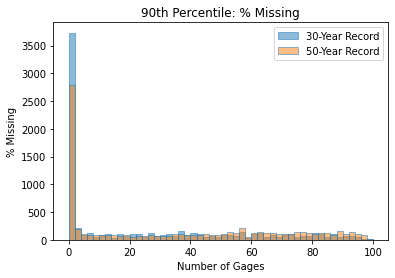

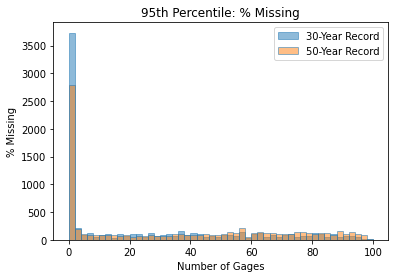

In [100]:
plt.hist(df_30_90['missing_data%'], bins=50, alpha=0.5, edgecolor='C0', label='30-Year Record')
plt.hist(df_50_90['missing_data%'], bins=50, alpha=0.5, edgecolor='C0', label='50-Year Record')
plt.xlabel('Number of Gages')
plt.ylabel('% Missing')
plt.title('90th Percentile: % Missing')
plt.legend()
plt.show()

plt.hist(df_30_95['missing_data%'], bins=50, alpha=0.5, edgecolor='C0', label='30-Year Record')
plt.hist(df_50_95['missing_data%'], bins=50, alpha=0.5, edgecolor='C0', label='50-Year Record')
plt.xlabel('Number of Gages')
plt.ylabel('% Missing')
plt.title('95th Percentile: % Missing')
plt.legend()
plt.show()

### Select sites that are within the 30-year and 50-year valid sites

In [191]:
def sort_data(df):
    df_sort = df.sort_values(by='threshold')
    df_zero_hmf = df_sort[df_sort['threshold'] == 0]
    df_sort = df_sort[df_sort['threshold'] > 0]
    df_sort['site_no'] = df_sort['site_no'].astype(str)
    return df_sort, df_zero_hmf

df_30_90_sort, df_30_90_zero_hmf = sort_data(df_30_90_valid) # NOTE: 24 gages with 0 cfs as threshold
df_50_90_sort, df_50_90_zero_hmf = sort_data(df_50_90_valid) # NOTE: 12 gages with 0 cfs as threshold
df_30_90_merge = pd.merge(df_30_90_sort, df_50_90_sort, on='site_no', how='inner', suffixes=('_30', '_50')) # only keep rows from second df that appear in first first df
df_90_merge = pd.merge(df_30_90_merge, df_50_90_sort, on='site_no', how='inner', suffixes=('_30', '_50'))
# NOTE: df_90_merge sorted by 30-year threshold (smallest -> largest)

df_30_95_sort, df_30_95_zero_hmf = sort_data(df_30_95_valid)
df_50_95_sort, df_50_95_zero_hmf = sort_data(df_50_95_valid)
df_30_95_merge = pd.merge(df_30_95_sort, df_50_95_sort, on='site_no', how='inner', suffixes=('_30', '_50')) # only keep rows from second df that appear in first first df
df_95_merge = pd.merge(df_30_95_merge, df_50_95_sort, on='site_no', how='inner', suffixes=('_30', '_50'))
# NOTE: df_95_merge sorted by 30-year threshold (smallest -> largest)

In [194]:
print('--- 90th Percentile ---')
print(f'30-Year gages (valid = True): {len(df_30_90_valid)}')
print('30-year gages with threshold > 0 cfs:', len(df_30_90_sort))
print(f'50-Year gages (valid = True): {len(df_50_90_valid)}')
print('50-year gages with threshold > 0 cfs:', len(df_50_90_sort))
print('50-year gages in 30-year gages list:', len(df_30_90_merge))
print('30-year gages in 50-year gages list:', len(df_90_merge))

print('--- 95th Percentile ---')
print(f'30-Year gages (valid = True): {len(df_30_95_valid)}')
print('30-year gages with threshold > 0 cfs:', len(df_30_95_sort))
print(f'50-Year gages (valid = True): {len(df_50_95_valid)}')
print('50-year gages with threshold > 0 cfs:', len(df_50_95_sort))
print('50-year gages in 30-year gages list:', len(df_30_95_merge))
print('30-year gages in 50-year gages list:', len(df_95_merge))

--- 90th Percentile ---
30-Year gages (valid = True): 4241
30-year gages with threshold > 0 cfs: 4217
50-Year gages (valid = True): 3316
50-year gages with threshold > 0 cfs: 3304
50-year gages in 30-year gages list: 3242
30-year gages in 50-year gages list: 3242
--- 95th Percentile ---
30-Year gages (valid = True): 4241
30-year gages with threshold > 0 cfs: 4229
50-Year gages (valid = True): 3316
50-year gages with threshold > 0 cfs: 3307
50-year gages in 30-year gages list: 3245
30-year gages in 50-year gages list: 3245


In [195]:
print(df_30_90_zero_hmf['site_no'].tolist())
print(df_50_90_zero_hmf['site_no'].tolist())

[8401900, 9419740, 9419756, 8185000, 9482000, 9486800, 9487000, 9512162, 8398500, 9513860, 8400000, 9517490, 8401200, 9520280, 11077500, 8404000, 8405150, 8202700, 13132513, 10259050, 10259100, 10259300, 10262500, 11122010]
[11077500, 9513860, 8398500, 8400000, 10259300, 8185000, 10262500, 8202700, 8405150, 8401900, 8404000, 8401200]


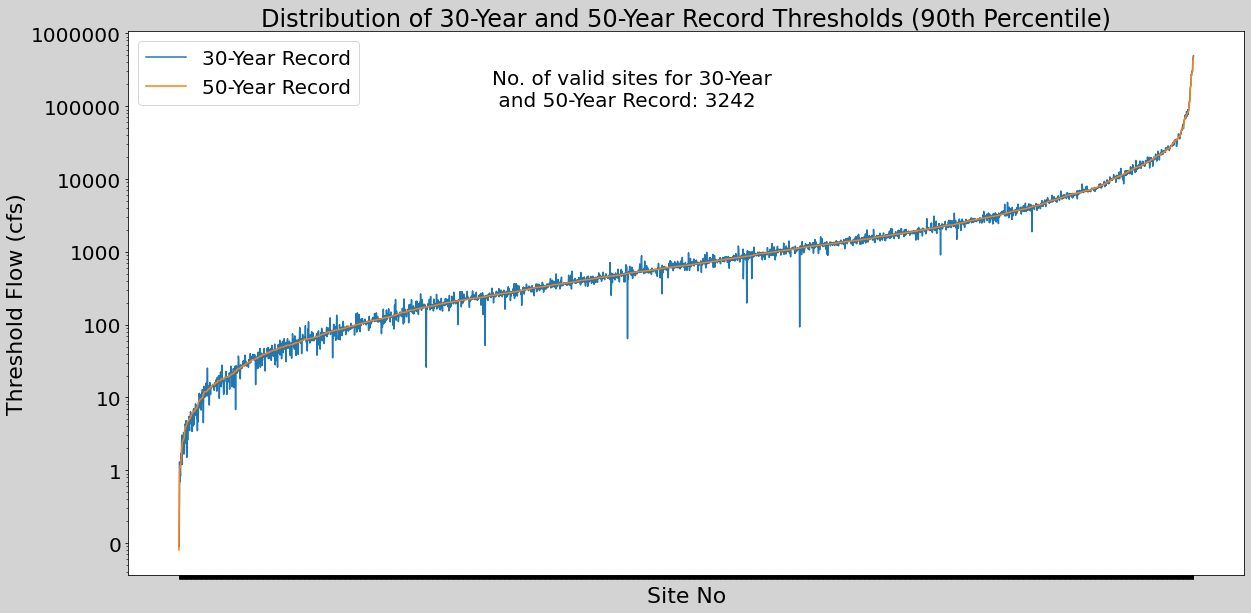

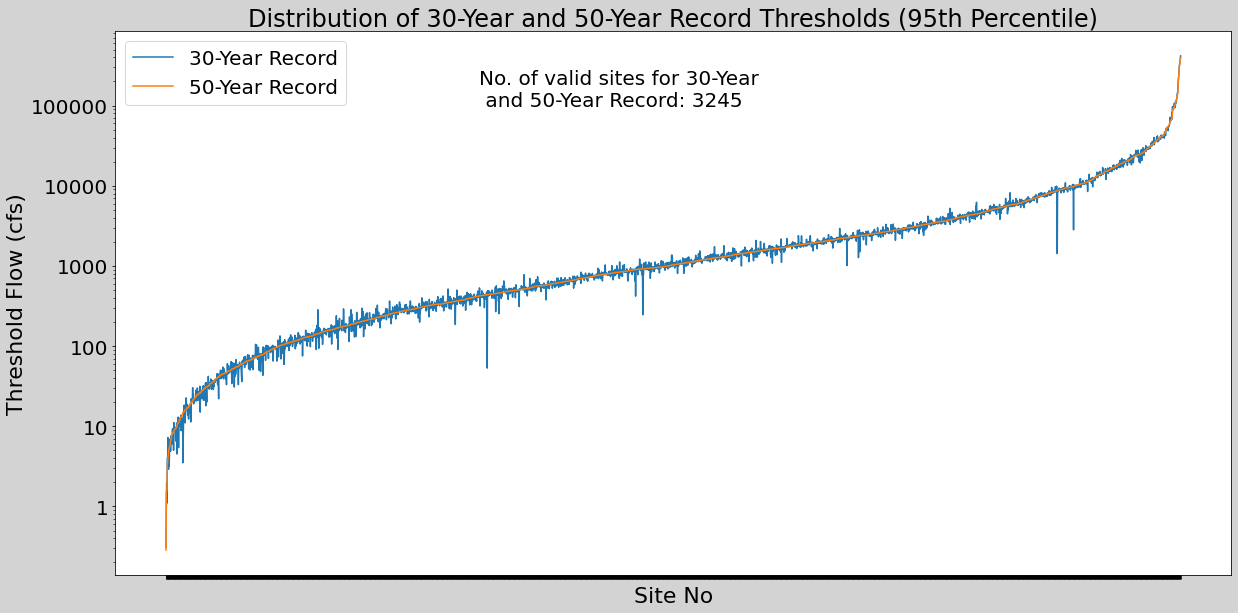

In [196]:
def plot_threshold_log(df, sort_date_range, start_value, end_value, percentile, save:True):
    fig, ax = plt.subplots(figsize=(20, 10), facecolor='lightgrey')

    df = df.sort_values(by=sort_date_range)
    
    if sort_date_range == 'threshold_50':
        ax.semilogy(df['site_no'][start_value:end_value], df['threshold_30'][start_value:end_value], color='C0', label='30-Year Record')
        ax.semilogy(df['site_no'][start_value:end_value], df['threshold_50'][start_value:end_value], color='C1', label='50-Year Record')
    elif sort_date_range == 'threshold_30':
        ax.semilogy(df['site_no'][start_value:end_value], df['threshold_50'][start_value:end_value], color='C1', label='50-Year Record')
        ax.semilogy(df['site_no'][start_value:end_value], df['threshold_30'][start_value:end_value], color='C0', label='30-Year Record')

    formatter = ScalarFormatter()
    formatter.set_scientific(False)  # Disable scientific notation
    plt.gca().yaxis.set_major_formatter(formatter)

    ax.set_xlabel('Site No', fontsize=22)
    ax.set_ylabel('Threshold Flow (cfs)', fontsize=22)
    ax.tick_params(axis='x',  rotation=90)
    ax.tick_params(axis='y', labelsize=20)
    plt.gca().set_xticklabels([])
    
    plt.title(f'Distribution of 30-Year and 50-Year Record Thresholds ({percentile}th Percentile)', fontsize=24)

    plt.legend(fontsize=20)
    
    if percentile == '90':
        plt.text(1000, 100000, f'No. of valid sites for 30-Year \n and 50-Year Record: {len(df_90_merge)}', fontsize=20)
    else:
        plt.text(1000, 100000, f'No. of valid sites for 30-Year \n and 50-Year Record: {len(df_95_merge)}', fontsize=20)

    if save == True:
        plt.savefig(f'Saved_Visuals/Valid_gages/threshold_compare_log_{sort_date_range}_{percentile}.png', bbox_inches='tight')
    plt.show()
    return

#plot_threshold_log(df_90_merge, 'threshold_50', 0, 500, '90', False)
plot_threshold_log(df_90_merge, 'threshold_50', 0, len(df_90_merge), '90', True)
plot_threshold_log(df_95_merge, 'threshold_50', 0, len(df_90_merge), '95', True)

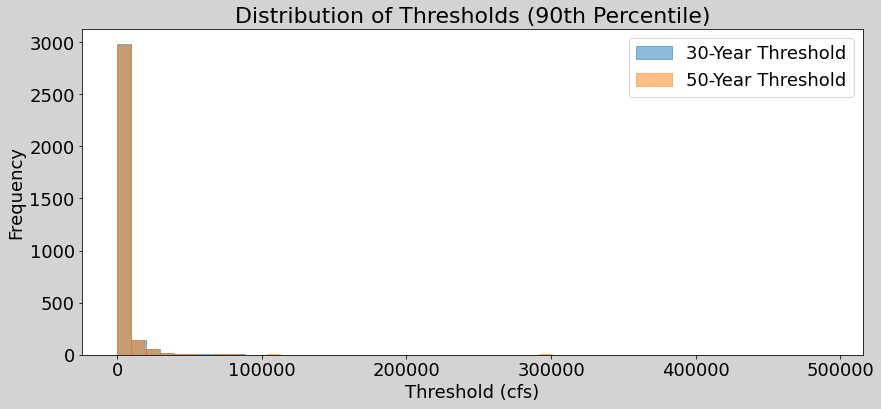

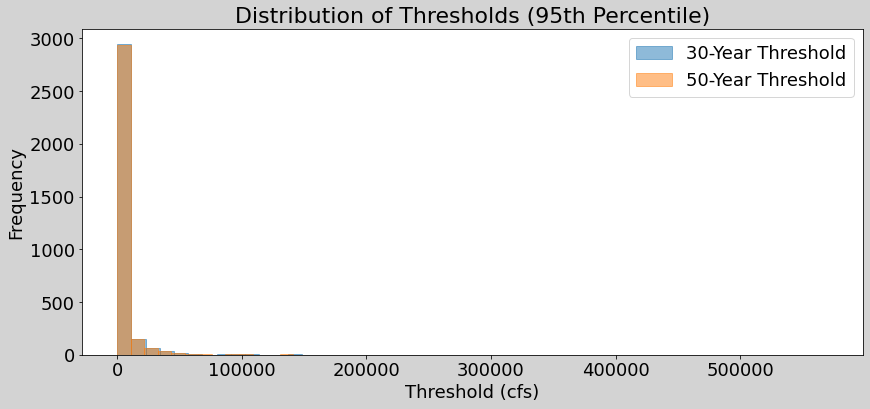

In [198]:
# Histogram of thresholds by frequnecy
def histogram_thresholds(df, percentile):
    plt.figure(figsize=(14, 6), facecolor='lightgrey')
    plt.hist(df['threshold_30'], bins=50, alpha=0.5, color='C0', edgecolor='C0', label='30-Year Threshold')
    plt.hist(df['threshold_50'], bins=50, alpha=0.5, color='C1', edgecolor='C1', label='50-Year Threshold')
    plt.xlabel('Threshold (cfs)', fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    plt.title(f'Distribution of Thresholds ({percentile}th Percentile)', fontsize=22)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=18)
    plt.savefig(f'Saved_Visuals/Valid_gages/threshold_compare_hist_{percentile}.png', bbox_inches='tight')
    plt.show()
    
histogram_thresholds(df_90_merge, '90')
histogram_thresholds(df_95_merge, '95')

### Compare 30-year thresholds to 50-year thresholds for corresponding gages

In [199]:
# Calculate how much higher the 30-year threshold is than the 50-year threshold
df_90_merge['pct_diff'] = (df_90_merge['threshold_30'] - df_90_merge['threshold_50']) / df_90_merge['threshold_50'] * 100
df_95_merge['pct_diff'] = (df_95_merge['threshold_30'] - df_95_merge['threshold_50']) / df_95_merge['threshold_50'] * 100

In [200]:
#df_90_merge = df_90_merge.sort_values(by='threshold_50')

In [205]:
df_90_merge[['site_no', 'threshold_30', 'threshold_50', 'pct_diff']]

site_no  threshold_30  threshold_50   pct_diff
0      9423350         0.090          0.08  12.500000
1      8197500         0.090          0.24 -62.500000
2      9537200         0.690          1.10 -37.272727
3     10263000         0.830          1.20 -30.833333
4     11089500         1.073          1.10  -2.454545
...        ...           ...           ...        ...
3237   3303280    303000.000     294000.00   3.061224
3238   3294500    306000.000     298000.00   2.684564
3239   7010000    453000.000     429000.00   5.594406
3240   7020500    471000.000     449000.00   4.899777
3241   7022000    491000.000     470000.00   4.468085

[3242 rows x 4 columns]

In [202]:
# Scatter plot illustrating percent change in 30-yr vs. 50-year record thresholds
# fig, ax = plt.subplots(figsize=(20, 5), facecolor='lightgrey')
# df_90_merge_resort = df_90_merge.sort_values(by='threshold_50')
# ax.plot(df_90_merge_resort['site_no'], df_90_merge_resort['pct_diff'], label='90th perc.')
# #df_95_merge_resort = df_95_merge.sort_values(by='threshold_50')
# #ax.plot(df_95_merg_resorte['site_no'], df_95_merge_resort['pct_diff'], label='95th perc.')
# ax.set_ylabel('Percent Change')
# plt.show()

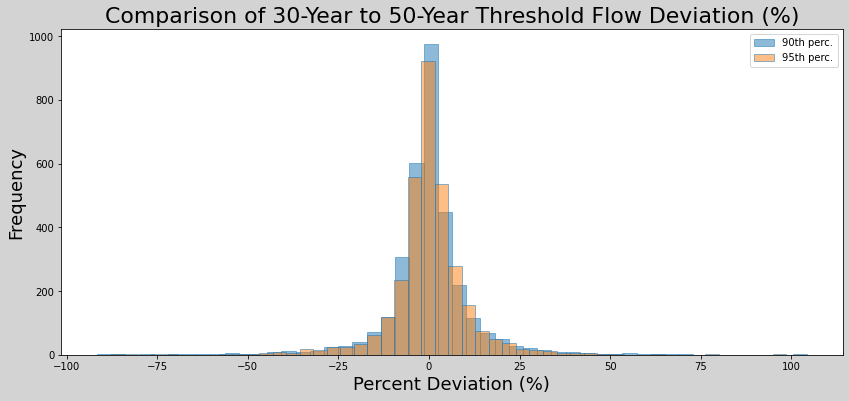

In [206]:
plt.figure(figsize=(14, 6), facecolor='lightgrey')
plt.hist(df_90_merge['pct_diff'], bins=50, alpha=0.5, edgecolor='C0', label='90th perc.')
plt.hist(df_95_merge['pct_diff'], bins=50, alpha=0.5, edgecolor='C0', label='95th perc.')
plt.xlabel('Percent Deviation (%)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Comparison of 30-Year to 50-Year Threshold Flow Deviation (%)', fontsize=22)
plt.legend()
plt.savefig(f'Saved_Visuals/Valid_gages/threshold_pct_diff_hist.png', bbox_inches='tight')
plt.show()

In [207]:
# Function to map gages by percent deviation
def pct_diff_map(df, percentile):
    trend_options = ['higher_outliers', 'lower_outliers', 'higher_75perc', 'lower_25perc', 'iqr']
    colors = {'higher_outliers': 'red', 'lower_outliers': 'blue', 'higher_75perc': 'orange', 'lower_25perc':'green', 'iqr': 'yellow'}
    markers = {'higher_outliers': '^', 'lower_outliers': 'v', 'higher_75perc': '^', 'lower_25perc':'v', 'iqr': 'o'}
    labels = {'higher_outliers': '% Deviation > Max', 'lower_outliers': '% Deviation < Min', 
              'higher_75perc': 'Q3 < % Deviation < Max', 'lower_25perc':'Min < % Deviation < Q1', 'iqr': 'Q1 < % Deviation < Q3'}
    markersizes = {'higher_outliers': 500, 'lower_outliers': 500, 'higher_75perc': 200, 'lower_25perc':200, 'iqr': 50}
    
    fig, ax = plt.subplots(figsize=(35, 35))

    lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
    lower48 = lower48.to_crs(epsg=4269)
    #lower48 = lower48.to_crs('ESRI:102003')
    lower48.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.0) 

    # aq_names = [aq.name for aq in aquifers]
    # aq_gdf = aq_shape[aq_shape['aq_name'].isin(aq_names)]
    # aq_gdf = aq_gdf.to_crs(epsg=4269)
    # #aq_gdf = aq_gdf.to_crs('ESRI:102003')
    # aq_gdf.plot(ax=ax, edgecolor='black', facecolor='purple', linewidth=1.5, alpha=0.2)

    # Gages plot, with points marked by MK trend
    # lat = df['dec_lat_va'].tolist()
    # long = df['dec_long_va'].tolist()
    # geometry = [Point(xy) for xy in zip(long, lat)]
    # geo_df = gpd.GeoDataFrame(geometry=geometry)
    #bx = geo_df.plot(ax=ax, color='red', marker='o', markersize=100, edgecolor='black', linewidth=1, alpha=0.75, legend=True)

    for trend_opt in trend_options:
        if trend_opt == 'iqr':
            df_subset = df[(df['pct_diff'] > Q1) & (df['pct_diff'] < Q3)]
            lat = df_subset['dec_lat_va'].tolist()
            long = df_subset['dec_long_va'].tolist()
            geometry = [Point(xy) for xy in zip(long, lat)]
            geo_subset = gpd.GeoDataFrame(geometry=geometry)
            #geo_subset = geo_df.iloc[df_subset.index]
            bx = geo_subset.plot(ax=ax, color=colors[trend_opt], marker=markers[trend_opt], markersize=markersizes[trend_opt], 
                                 label=labels[trend_opt], edgecolor='black', linewidth=1, alpha=0.75, legend=True)    
        elif trend_opt == 'higher_outliers':
            df_subset = df[(df['pct_diff'] > upper_whisker)]
            lat = df_subset['dec_lat_va'].tolist()
            long = df_subset['dec_long_va'].tolist()
            geometry = [Point(xy) for xy in zip(long, lat)]
            geo_subset = gpd.GeoDataFrame(geometry=geometry)
            #geo_subset = geo_df.iloc[df_subset.index]
            bx = geo_subset.plot(ax=ax, color=colors[trend_opt], marker=markers[trend_opt], markersize=markersizes[trend_opt], 
                                 label=labels[trend_opt], edgecolor='black', linewidth=1, alpha=0.75, legend=True)
        elif trend_opt == 'higher_75perc':
            df_subset = df[(df['pct_diff'] < upper_whisker) & (df['pct_diff'] > Q3)]
            lat = df_subset['dec_lat_va'].tolist()
            long = df_subset['dec_long_va'].tolist()
            geometry = [Point(xy) for xy in zip(long, lat)]
            geo_subset = gpd.GeoDataFrame(geometry=geometry)
            #geo_subset = geo_df.iloc[df_subset.index]
            bx = geo_subset.plot(ax=ax, color=colors[trend_opt], marker=markers[trend_opt], markersize=markersizes[trend_opt], 
                                 label=labels[trend_opt], edgecolor='black', linewidth=1, alpha=0.75, legend=True)
        elif trend_opt == 'lower_25perc':
            df_subset = df[(df['pct_diff'] > lower_whisker) & (df['pct_diff'] < Q1)]
            lat = df_subset['dec_lat_va'].tolist()
            long = df_subset['dec_long_va'].tolist()
            geometry = [Point(xy) for xy in zip(long, lat)]
            geo_subset = gpd.GeoDataFrame(geometry=geometry)
            #geo_subset = geo_df.iloc[df_subset.index]
            bx = geo_subset.plot(ax=ax, color=colors[trend_opt], marker=markers[trend_opt], markersize=markersizes[trend_opt], 
                                 label=labels[trend_opt], edgecolor='black', linewidth=1, alpha=0.75, legend=True)
        elif trend_opt == 'lower_outliers':
            df_subset = df[(df['pct_diff'] < lower_whisker)]
            lat = df_subset['dec_lat_va'].tolist()
            long = df_subset['dec_long_va'].tolist()
            geometry = [Point(xy) for xy in zip(long, lat)]
            geo_subset = gpd.GeoDataFrame(geometry=geometry)
            #geo_subset = geo_df.iloc[df_subset.index]
            bx = geo_subset.plot(ax=ax, color=colors[trend_opt], marker=markers[trend_opt], markersize=markersizes[trend_opt], 
                                 label=labels[trend_opt], edgecolor='black', linewidth=1, alpha=0.75, legend=True)

    plt.title(f'Comparison of 30-Year to 50-Year Threshold Flow Deviation (%) \n ({percentile}th Percentile)', fontsize=36)
    plt.legend(fontsize=28)

    plt.axis("off")

    plt.tight_layout()
    plt.savefig(f'Saved_Visuals/Valid_gages/outlier_gages_map_{percentile}.png', bbox_inches='tight')
    plt.show()
    return

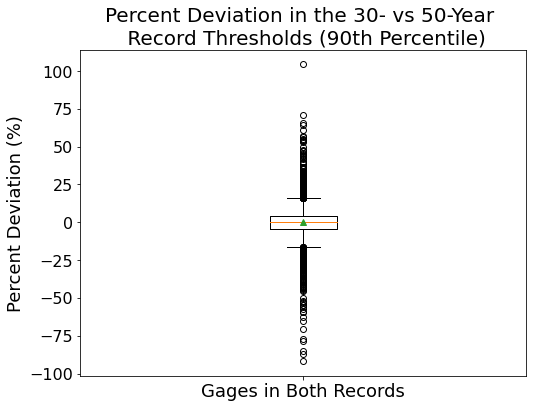

25th Percentile: -4.285714285714285
Median: 0.0
Mean: -0.11951272466930993
75th Percentile: 3.845552884615471
Lower whisker: -16.48261504120892
Upper whisker: 16.042453640110107


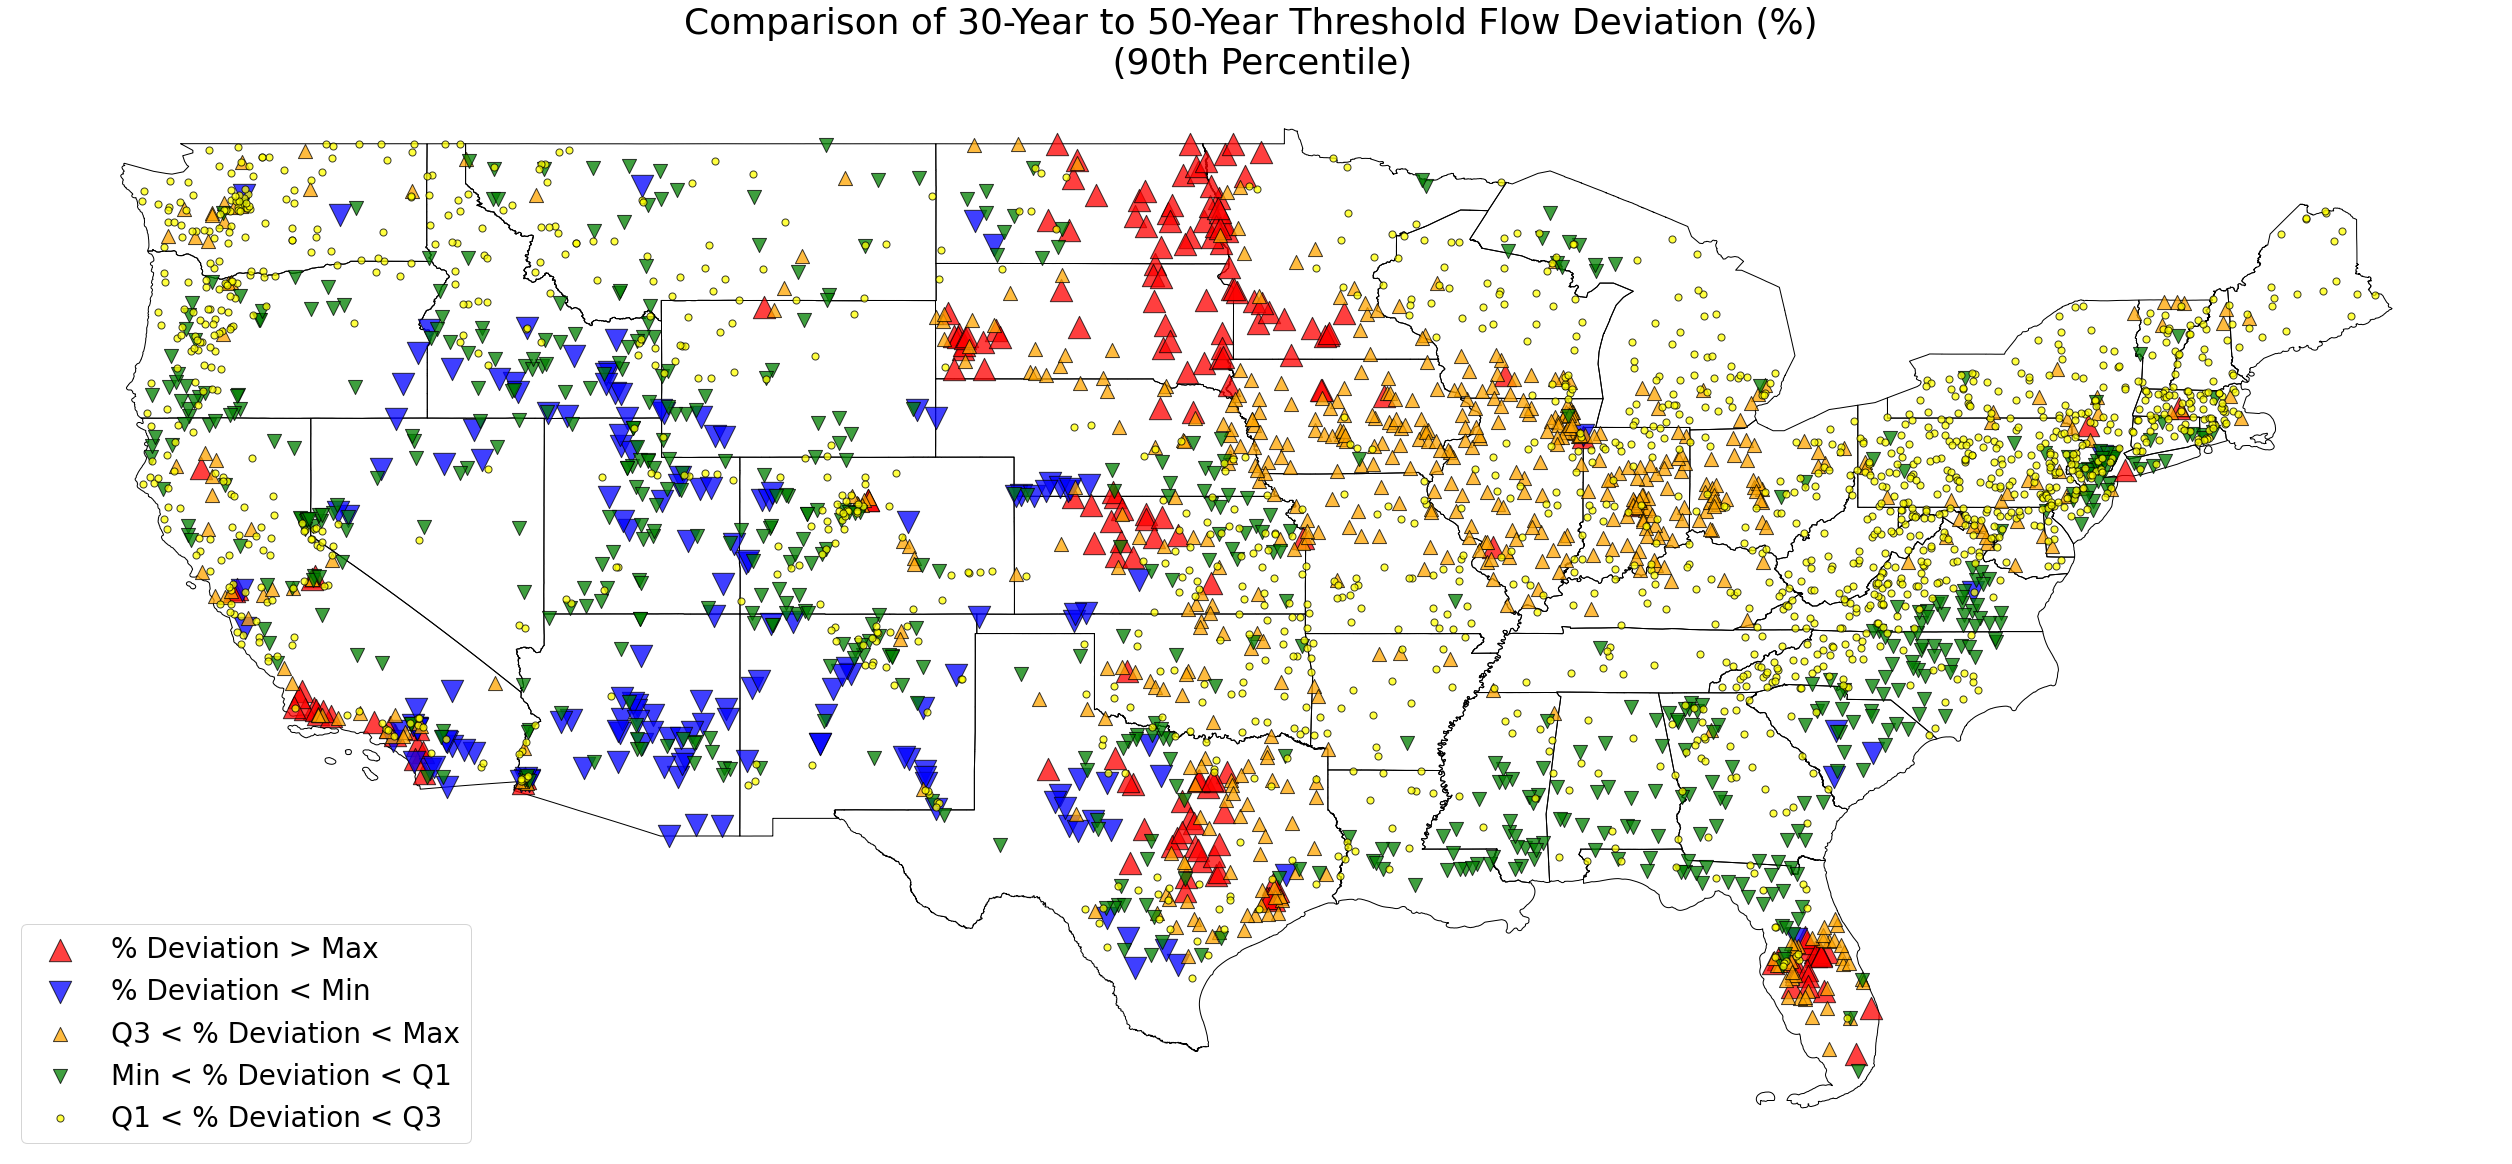

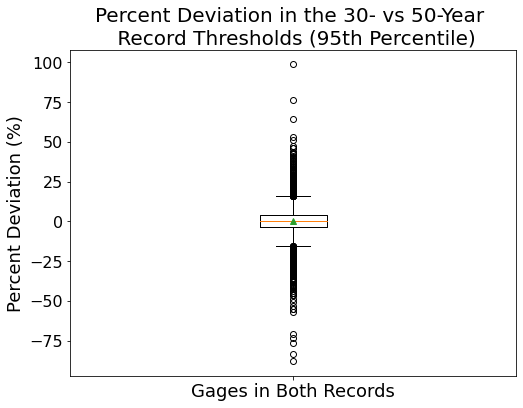

25th Percentile: -3.8461538461538463
Median: 0.0
Mean: -0.08754247620756264
75th Percentile: 4.0
Lower whisker: -15.615384615384617
Upper whisker: 15.76923076923077


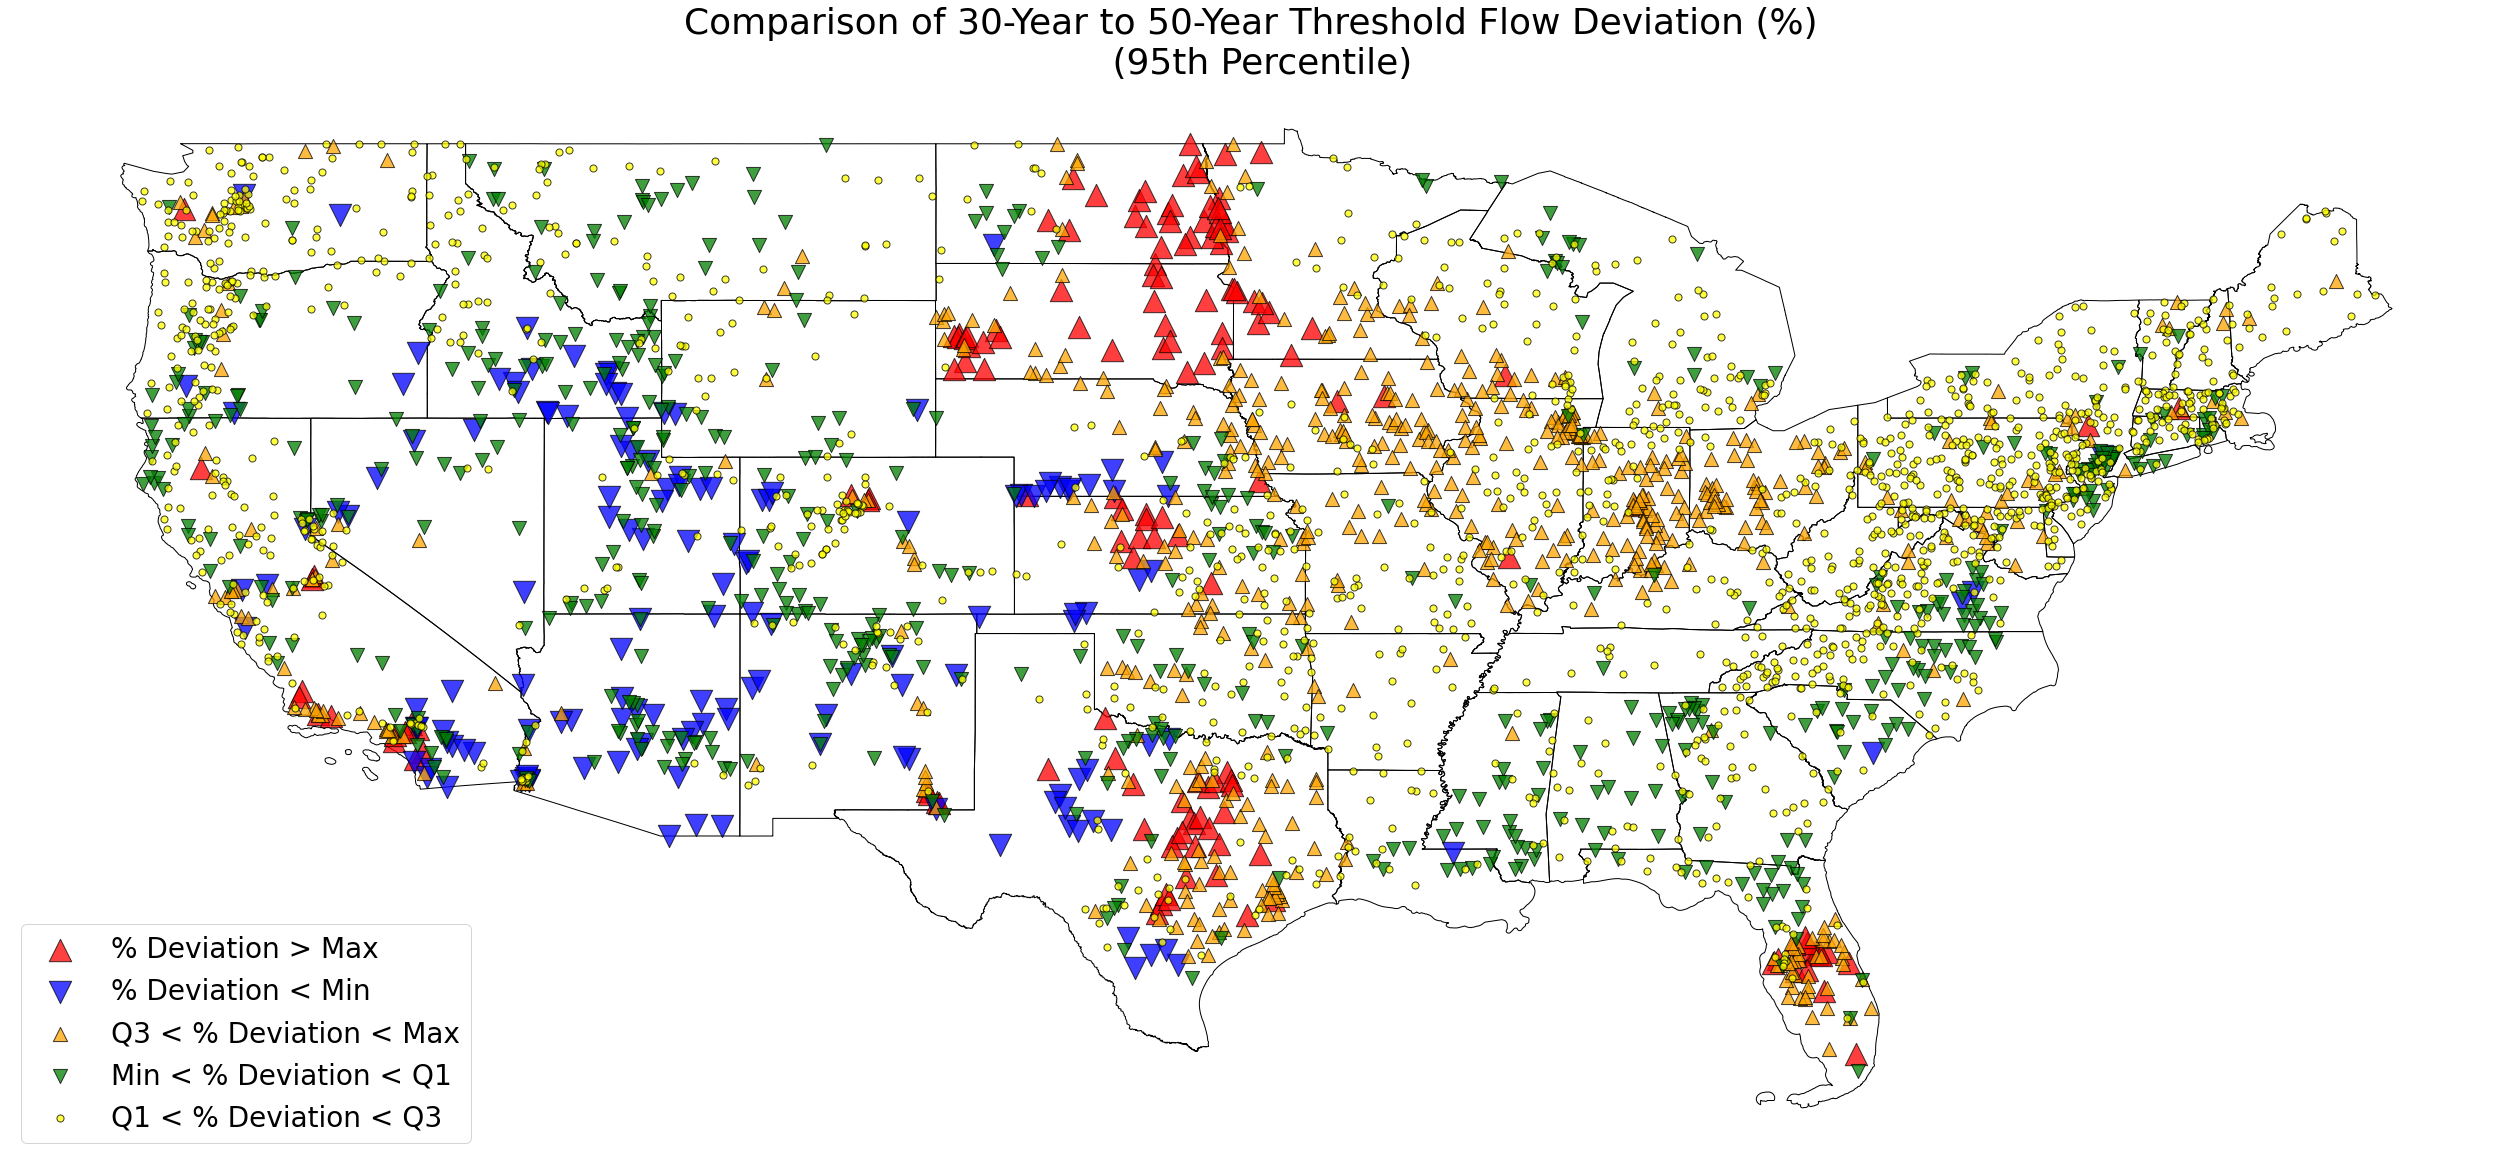

In [212]:
# Box plot of percent change
def pct_diff_boxplot(df, percentile):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.boxplot(df['pct_diff'], showmeans=True)
    ax.set_xticks([1], ['Gages in Both Records'], fontsize=18)
    ax.set_ylabel('Percent Deviation (%)', fontsize=18)
    ax.tick_params(axis='y', labelsize=16)
    plt.title(f'Percent Deviation in the 30- vs 50-Year \n Record Thresholds ({percentile}th Percentile)', fontsize=20)
    plt.savefig(f'Saved_Visuals/Valid_gages/threshold_compare_boxplot_{percentile}.png', bbox_inches='tight')
    plt.show()

    Q1 = np.percentile(df['pct_diff'], 25)
    Q3 = np.percentile(df['pct_diff'], 75)
    IQR = Q3 - Q1
    lower_whisker = np.percentile(df['pct_diff'], 0) if Q1 - 1.5 * IQR < np.min(df['pct_diff']) else Q1 - 1.5 * IQR
    upper_whisker = np.percentile(df['pct_diff'], 100) if Q3 + 1.5 * IQR > np.max(df['pct_diff']) else Q3 + 1.5 * IQR

    print('25th Percentile:', Q1)
    print('Median:', np.median(df['pct_diff']))
    print('Mean:', np.mean(df['pct_diff']))
    print('75th Percentile:', Q3)
    print("Lower whisker:", lower_whisker)
    print("Upper whisker:", upper_whisker)
    
    pct_diff_map(df, percentile)
    
    return 

pct_diff_boxplot(df_90_merge, '90')
pct_diff_boxplot(df_95_merge, '95')

In [215]:
# QA/QC PERCENT DIFFERENCE
# percentile = '90'
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.boxplot(df_90_merge['pct_diff'], showmeans=True)
# ax.set_xticks([1], ['All Overlapping Sites'], fontsize=18)
# ax.set_ylabel('Percent Difference (%)', fontsize=18)
# ax.tick_params(axis='y', labelsize=16)
# plt.title(f'Boxplot Illustrating the Percent Difference in the \n 30- vs 50-Year Record Thresholds ({percentile}th Percentile)', fontsize=20)
# plt.savefig(f'Saved_Visuals/Valid_gages/threshold_compare_boxplot_{percentile}.png', bbox_inches='tight')
# plt.show()

# Q1 = np.percentile(df_90_merge['pct_diff'], 25)
# Q3 = np.percentile(df_90_merge['pct_diff'], 75)
# IQR = Q3 - Q1
# lower_whisker = np.percentile(df_90_merge['pct_diff'], 0) if Q1 - 1.5 * IQR < np.min(df_90_merge['pct_diff']) else Q1 - 1.5 * IQR
# upper_whisker = np.percentile(df_90_merge['pct_diff'], 100) if Q3 + 1.5 * IQR > np.max(df_90_merge['pct_diff']) else Q3 + 1.5 * IQR

# print('25th Percentile:', Q1)
# print('Median:', np.median(df_90_merge['pct_diff']))
# print('Mean:', np.mean(df_90_merge['pct_diff']))
# print('75th Percentile:', Q3)
# print("Lower whisker:", lower_whisker)
# print("Upper whisker:", upper_whisker)

# trend_options = ['higher_outliers', 'lower_outliers', 'higher_75perc', 'lower_25perc', 'iqr']
# colors = {'higher_outliers': 'red', 'lower_outliers': 'blue', 'higher_75perc': 'orange', 'lower_25perc':'green', 'iqr': 'yellow'}
# markers = {'higher_outliers': '^', 'lower_outliers': 'v', 'higher_75perc': '^', 'lower_25perc':'v', 'iqr': 'o'}
# labels = {'higher_outliers': '% Deviation > Max', 'lower_outliers': '% Deviation < Min', 
#           'higher_75perc': 'Q3 < % Deviation < Max', 'lower_25perc':'Min < % Deviation < Q1', 'iqr': 'Q1 < % Deviation < Q3'}
# markersizes = {'higher_outliers': 500, 'lower_outliers': 500, 'higher_75perc': 200, 'lower_25perc':200, 'iqr': 50}

# ############################################

# fig, ax = plt.subplots(figsize=(35, 35))

# lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
# lower48 = lower48.to_crs(epsg=4269)
# #lower48 = lower48.to_crs('ESRI:102003')
# lower48.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.0) 

# #print(df_90_merge[['dec_long_va', 'dec_lat_va', 'pct_diff']][0:15])
# lat = df_90_merge['dec_lat_va'].tolist()
# long = df_90_merge['dec_long_va'].tolist()
# geometry = [Point(xy) for xy in zip(long, lat)]
# geo_df = gpd.GeoDataFrame(geometry=geometry)
# print(geo_df[0:15])
# df_subset = df_90_merge[(df_90_merge['pct_diff'] > upper_whisker)]
# print(df_subset[['dec_long_va', 'dec_lat_va', 'pct_diff']][0:15])
# geo_subset = geo_df.iloc[df_subset.index]
# print(geo_subset[0:15])
# bx = geo_subset.plot(ax=ax, color=colors[trend_opt], marker=markers[trend_opt], markersize=markersizes[trend_opt], 
#                      label=labels[trend_opt], edgecolor='black', linewidth=1, alpha=0.75, legend=True)  

# plt.title(f'Comparison of 30-Year to 50-Year Threshold Flow Deviation (%) \n ({percentile}th Percentile)', fontsize=36)
# plt.legend(fontsize=28)
# plt.axis("off")
# plt.tight_layout()
# #plt.savefig(f'Saved_Visuals/Valid_gages/outlier_gages_map_{percentile}.png', bbox_inches='tight')
# plt.show()

# ############################################

# fig, ax = plt.subplots(figsize=(35, 35))

# lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
# lower48 = lower48.to_crs(epsg=4269)
# #lower48 = lower48.to_crs('ESRI:102003')
# lower48.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.0) 

# print(df_90_merge[['dec_long_va', 'dec_lat_va', 'pct_diff']][0:15])
# df_subset2 = df_90_merge[(df_90_merge['pct_diff'] > upper_whisker)]
# print(df_subset2[['dec_long_va', 'dec_lat_va']][0:15])
# lat2 = df_subset2['dec_lat_va'].tolist()
# long2 = df_subset2['dec_long_va'].tolist()
# geometry2 = [Point(xy) for xy in zip(long2, lat2)]
# geo_subset2 = gpd.GeoDataFrame(geometry=geometry2)
# print(geo_subset2[0:15])
# bx = geo_subset2.plot(ax=ax, color=colors[trend_opt], marker=markers[trend_opt], markersize=markersizes[trend_opt], 
#                      label=labels[trend_opt], edgecolor='black', linewidth=1, alpha=0.75, legend=True)  

# plt.title(f'Comparison of 30-Year to 50-Year Threshold Flow Deviation (%) \n ({percentile}th Percentile)', fontsize=36)
# plt.legend(fontsize=28)
# plt.axis("off")
# plt.tight_layout()
# #plt.savefig(f'Saved_Visuals/Valid_gages/outlier_gages_map_{percentile}.png', bbox_inches='tight')
# plt.show()

In [201]:
# Plotting sites with different thresholds
lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
aq_shape = gpd.read_file('ShapeFiles/Aquifers/_Master_Aquifer/master_aquifer.shp')
streams = gpd.read_file('ShapeFiles/Streams_US/us_streams.shp')
counties_us = gpd.read_file('ShapeFiles/Counties_US/cb_2018_us_county_20m.shp')

aquifers = cl.ALL_AQUIFERS

### Mann-Kendall Trend Test

In [220]:
mkdatapath = f'Prelim_Data/National_Metrics/National_Metrics_30_90.xlsx'
df_mk = pd.read_excel(io=mkdatapath, sheet_name='mk_magnitude')
df_test = pd.merge(df_mk, df_30_90_valid, on='site_no', how='inner', suffixes=('_mk', '_valid'))

site_no  trend_zd   h_zd      p_zd      z_zd    tau_zd  s_zd  \
0      2342500  no trend  False  0.971536  0.035682  0.006897     3   
1      2361000  no trend  False  1.000000  0.000000  0.002299     1   
2      2363000  no trend  False  0.721226 -0.356821 -0.048276   -21   
3      2369800  no trend  False  0.865936 -0.168823 -0.024631   -10   
4      2371500  no trend  False  0.914752  0.107046  0.016092     7   
...        ...       ...    ...       ...       ...       ...   ...   
4236   9211200  no trend  False  0.611760 -0.507563 -0.082251   -19   
4237   9217000  no trend  False  0.693012 -0.394771 -0.064935   -15   
4238   9223000  no trend  False  0.895533  0.131306  0.019704     8   
4239   9224700  no trend  False  0.929745 -0.088166 -0.015385    -5   
4240  13018300  no trend  False  0.707382  0.375374  0.052910    20   

         var_s_zd  slope_zd    int_zd  ... dec_lat_va_valid  \
0     3141.666667  0.000019  0.083039  ...        32.316815   
1     3141.666667  0.000135  0.131424  ...        31.342949   
2     3141.666667 -0.000758  0.094878  ...        31.594887   
3     2842.000000 -0.000140  0.021791  ...        31.027680   
4     3141.666667  0.000210  0.112213  ...        31.573495   
...           ...       ...       ...  ...              ...   
4236  1257.666667 -0.002243  0.281894  ...        42.020972   
4237  1257.666667 -0.003667  0.305842  ...        41.516354   
4238  2842.000000  0.000053  0.014863  ...        42.110889   
4239  2058.333333 -0.000157  0.046053  ...        41.546072   
4240  2562.000000  0.000011  0.001043  ...        43.452153   

      dec_long_va_valid  data_start_valid  data_end_valid  total_record_valid  \
0            -85.014931        1946-10-01      2020-09-30                74.0   
1            -85.610491        1921-12-01      2020-09-30                98.8   
2            -85.782997        1938-10-01      2020-09-30                82.0   
3            -86.709957        1967-10-01      2020-09-30                53.0   
4            -86.251623        1937-10-01      2020-09-30                83.0   
...                 ...               ...             ...                 ...   
4236        -110.049806        1963-12-01      2020-09-30                56.8   
4237        -109.449023        1951-10-01      2020-09-30                69.0   
4238        -110.709417        1952-10-01      2020-09-30                68.0   
4239        -109.693475        1962-06-01      2020-09-30                58.3   
4240        -110.704091        1962-07-01      2020-09-30                58.3   

      state_valid  huc2_code_valid  huc4_code_valid  within_aq_valid  \
0              AL                3              313              NaN   
1              AL                3              314              NaN   
2              AL                3              314              NaN   
3              AL                3              314              NaN   
4              AL                3              314              NaN   
...           ...              ...              ...              ...   
4236           WY               14             1404   Upper_Colorado   
4237           WY               14             1404   Upper_Colorado   
4238           WY               14             1404   Upper_Colorado   
4239           WY               14             1404   Upper_Colorado   
4240           WY               17             1704              NaN   

      HCDN_2009  
0         False  
1         False  
2         False  
3         False  
4         False  
...         ...  
4236      False  
4237      False  
4238      False  
4239      False  
4240       True  

[4241 rows x 67 columns]

In [243]:
# Mann-Kendall
#datapath = f'Prelim_Data/National_Metrics/National_Metrics_{range}_{quantile}.xlsx'
#df_30_90 = pd.read_excel(datapath, sheet_name='site_metrics')

sheet_names = ['mk_magnitude', 'mk_duration','mk_intra_annual']
plot_names = {'mk_magnitude':'Annual Magnitude', 'mk_duration':'Annual Duration','mk_intra_annual':'Intra-Annual Frequency'}

def count_valid_trends(sheet_name, gages_included):
    '''Plot stacked bar plots that show number of sites with increasing, decreasing, or no trend'''
    
    date_ranges = ['30', '50']
    percentiles = ['90', '95']
    title_names = {'all_gages': 'All Gages', 'valid_gages': 'Valid Gages',}
    
    i = 0
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
    
    trend_dict = {}
    for date_range in date_ranges:
        
        trend_dict_perc = {}
        for percentile in percentiles:
    
            # Load data sets based on date_range and percentile
            datapath = f'Prelim_Data/National_Metrics/National_Metrics_{date_range}_{percentile}.xlsx'
            df = pd.read_excel(io=datapath, sheet_name=sheet_name)
            df_metrics = pd.read_excel(io=datapath, sheet_name='site_metrics')
            df_valid = df_metrics[df_metrics['valid'] == True]
            
            if gages_included == 'valid_gages':
                df = pd.merge(df, df_valid, on='site_no', how='inner', suffixes=('_mk', '_valid'))
            else:
                pass

            col_names = ['trend_zd', 'trend']
            x_labels = ['Zero-Deflated', 'Continuous']

            # Initialize arrays for each trend category
            no_trend = np.zeros(2)
            incr_trend = np.zeros(2)
            decr_trend = np.zeros(2)    

            # Count occurrences of each trend category in each column
            for col, x_label in zip(col_names, x_labels):
                if 'no trend' in df[col].value_counts():
                    no_trend[x_labels.index(x_label)] = df[col].value_counts()['no trend']
                if 'increasing' in df[col].value_counts():
                    incr_trend[x_labels.index(x_label)] = df[col].value_counts()['increasing']
                if 'decreasing' in df[col].value_counts():
                    decr_trend[x_labels.index(x_label)] = df[col].value_counts()['decreasing']

            # Plotting
            ax[i].bar(x_labels, no_trend)
            ax[i].bar(x_labels, incr_trend, bottom=no_trend)
            ax[i].bar(x_labels, decr_trend, bottom=no_trend+incr_trend)
            ax[i].set_title(f'Date Range: {date_range}, Percentile: {percentile}', fontsize=14)
            if i == 0:
                ax[i].set_ylabel('No. of Sites', fontsize=14)
                
            # Change tick mark sizes
            ax[i].tick_params(axis='x', labelsize=14) 
            ax[i].tick_params(axis='y', labelsize=14)
            
            # Create dictionary with occurrences of each trend category
            trend_dict_perc[percentile] = {'no_trend': no_trend, 'incr_trend': incr_trend, 'decr_trend': decr_trend}
        
            i += 1
        trend_dict[date_range] = trend_dict_perc
            
    plt.legend(['No trend', 'Increasing', 'Decreasing'])
    plt.suptitle(f'Significant Mann-Kendall Trends ({title_names[gages_included]}) \n {plot_names[sheet_name]}', y = 1.05, fontsize=14)
    plt.tight_layout()
    
    plt.savefig(f'Saved_Visuals/MK_test/MKT_count_{gages_included}_{sheet_name}.png', bbox_inches='tight')
#     img_str = f'../../results/saved_visuals/mkt_barplots_{aquifer}_{sheet_name}.png'
#     if os.path.exists(img_str) and overwrite:
#         plt.savefig(f'../../results/saved_visuals/mkt_barplots_{aquifer}_{sheet_name}.png')
#     elif not os.path.exists(img_str):
#         plt.savefig(f'../../results/saved_visuals/mkt_barplots_{aquifer}_{sheet_name}.png')

    plt.show()
    return trend_dict

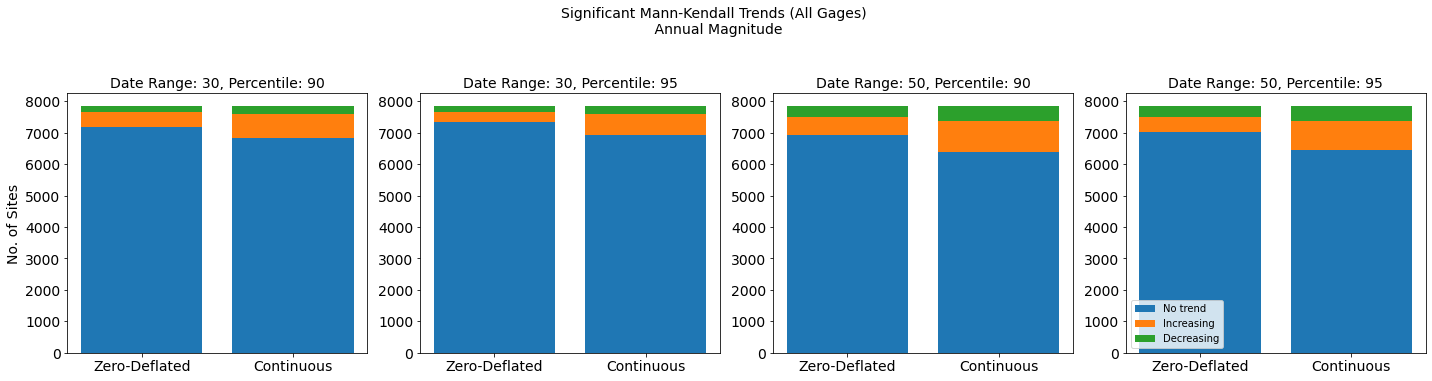

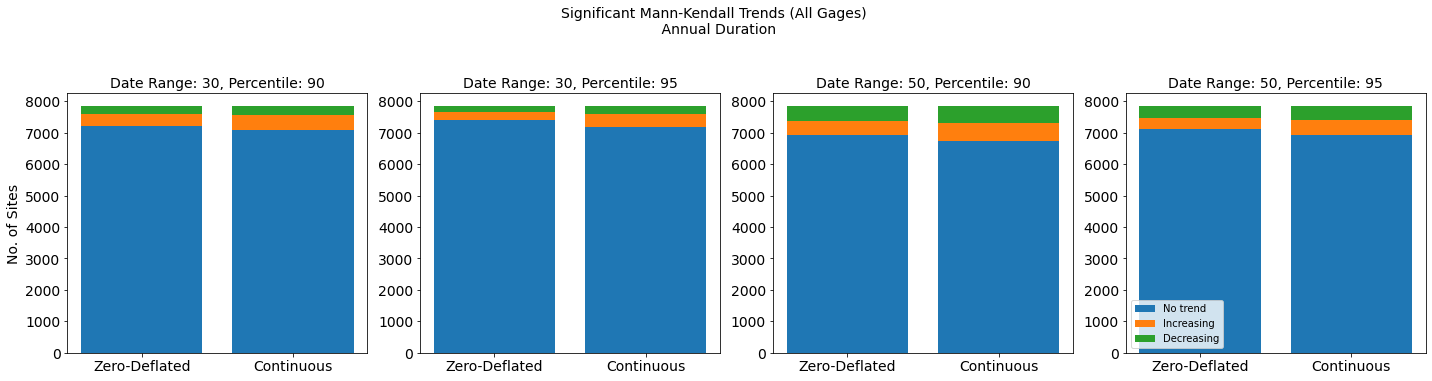

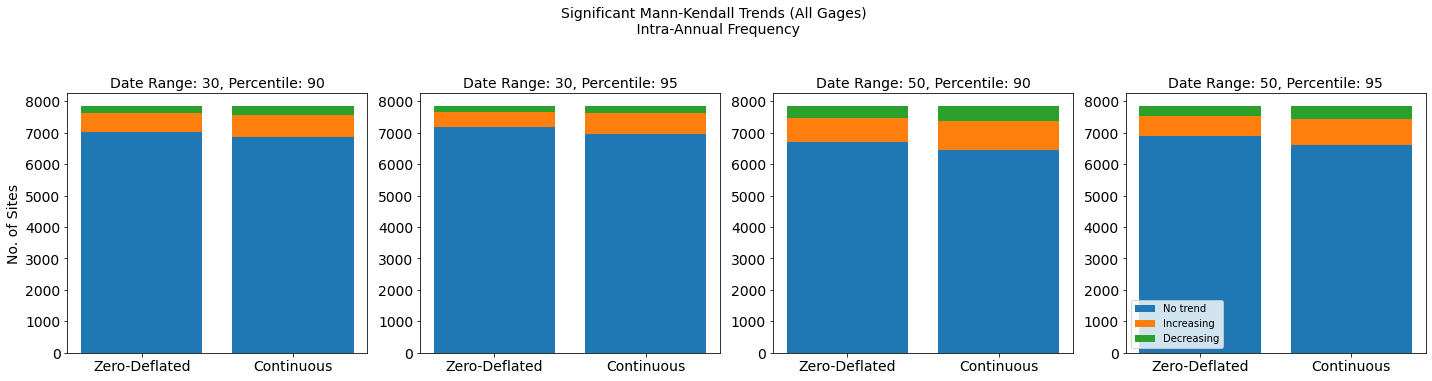

In [239]:
mk_count_all_gages = {}
for sheet_name in sheet_names:
    mk_count_all_gages[sheet_name] = count_valid_trends(sheet_name, 'all_gages')

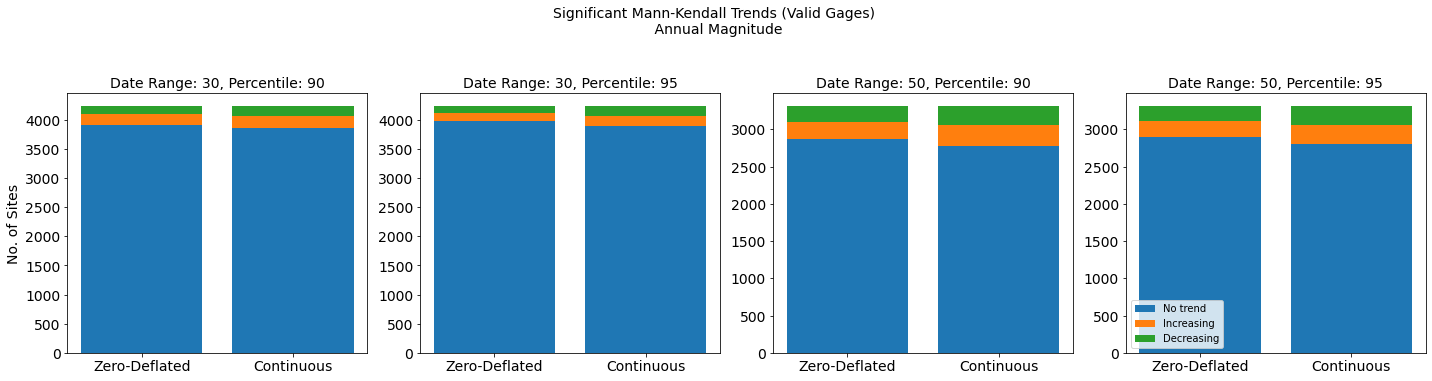

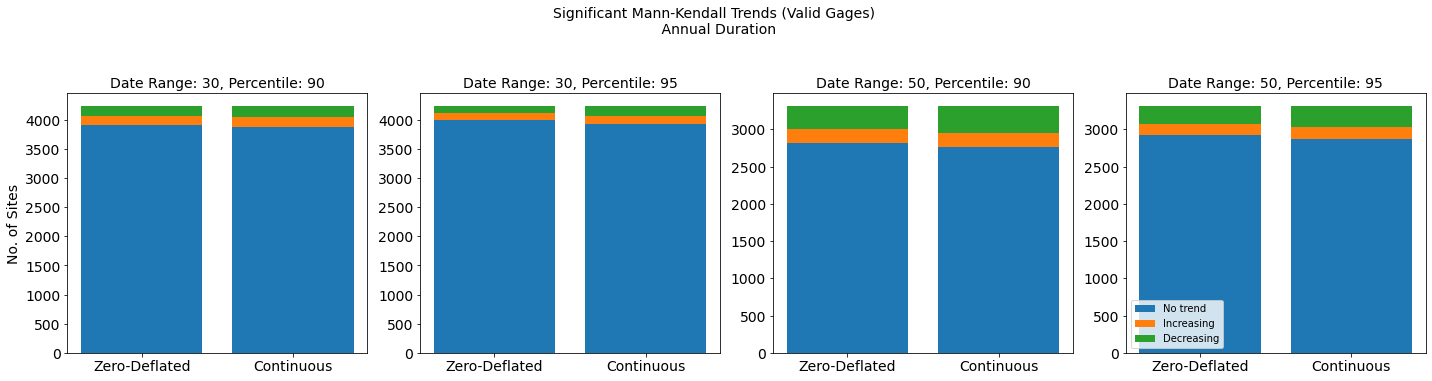

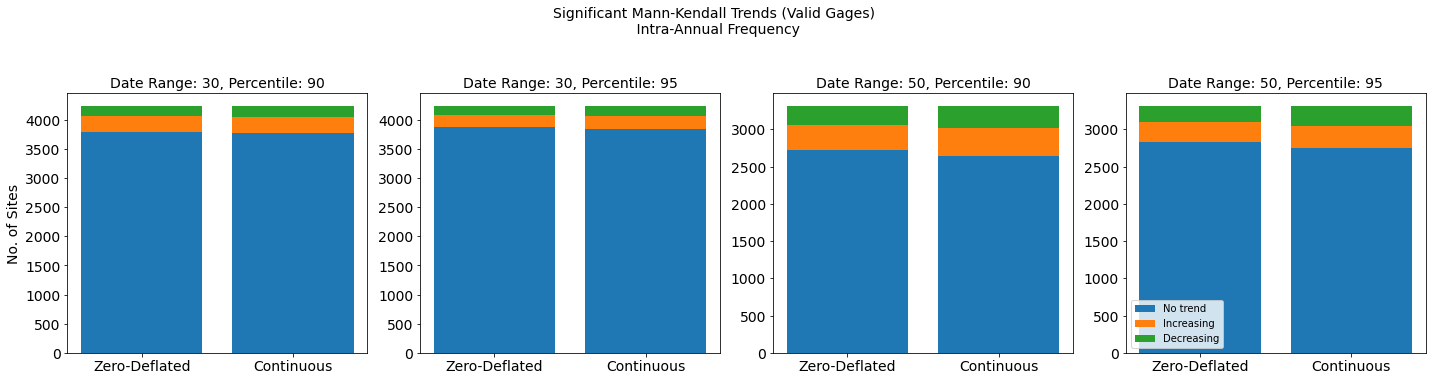

In [244]:
mk_count_valid_gages = {}
for sheet_name in sheet_names:
    mk_count_valid_gages[sheet_name] = count_valid_trends(sheet_name, 'valid_gages')

In [ ]:
# Count ofs gages in bar plots for each trend category
#mk_count_all_gages
#mk_count_valid_gages

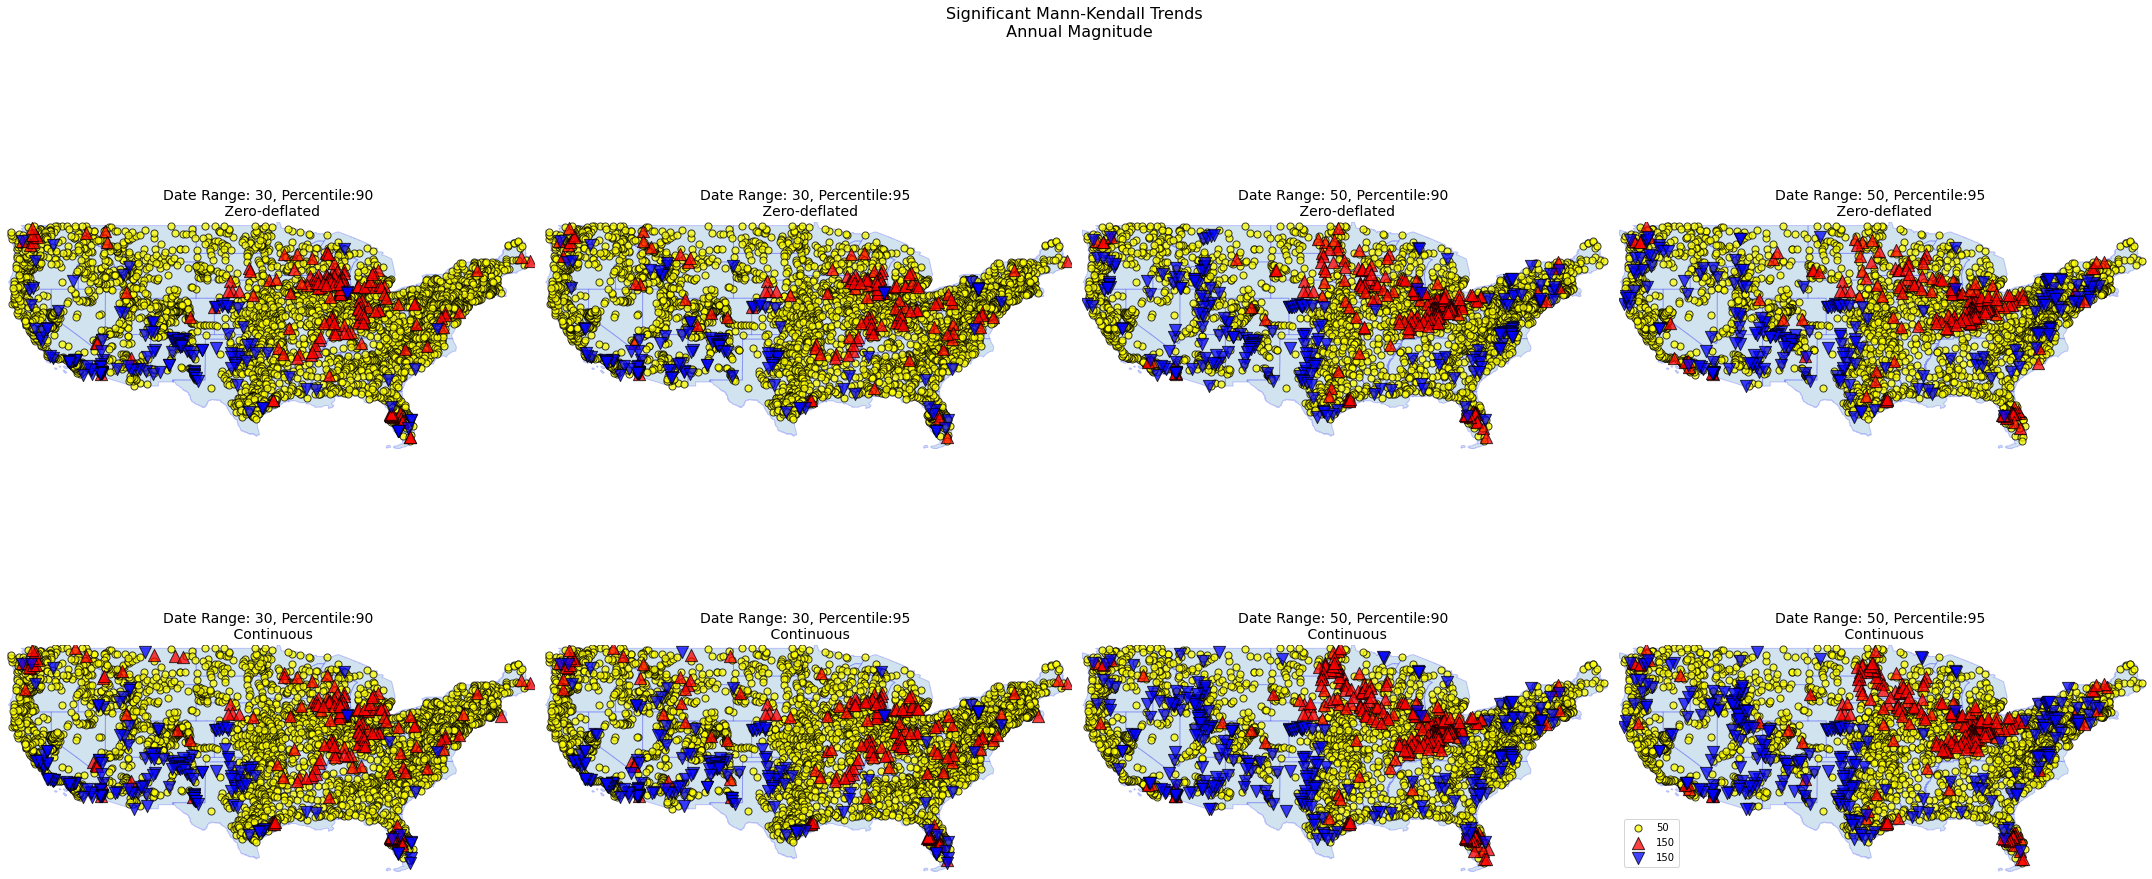

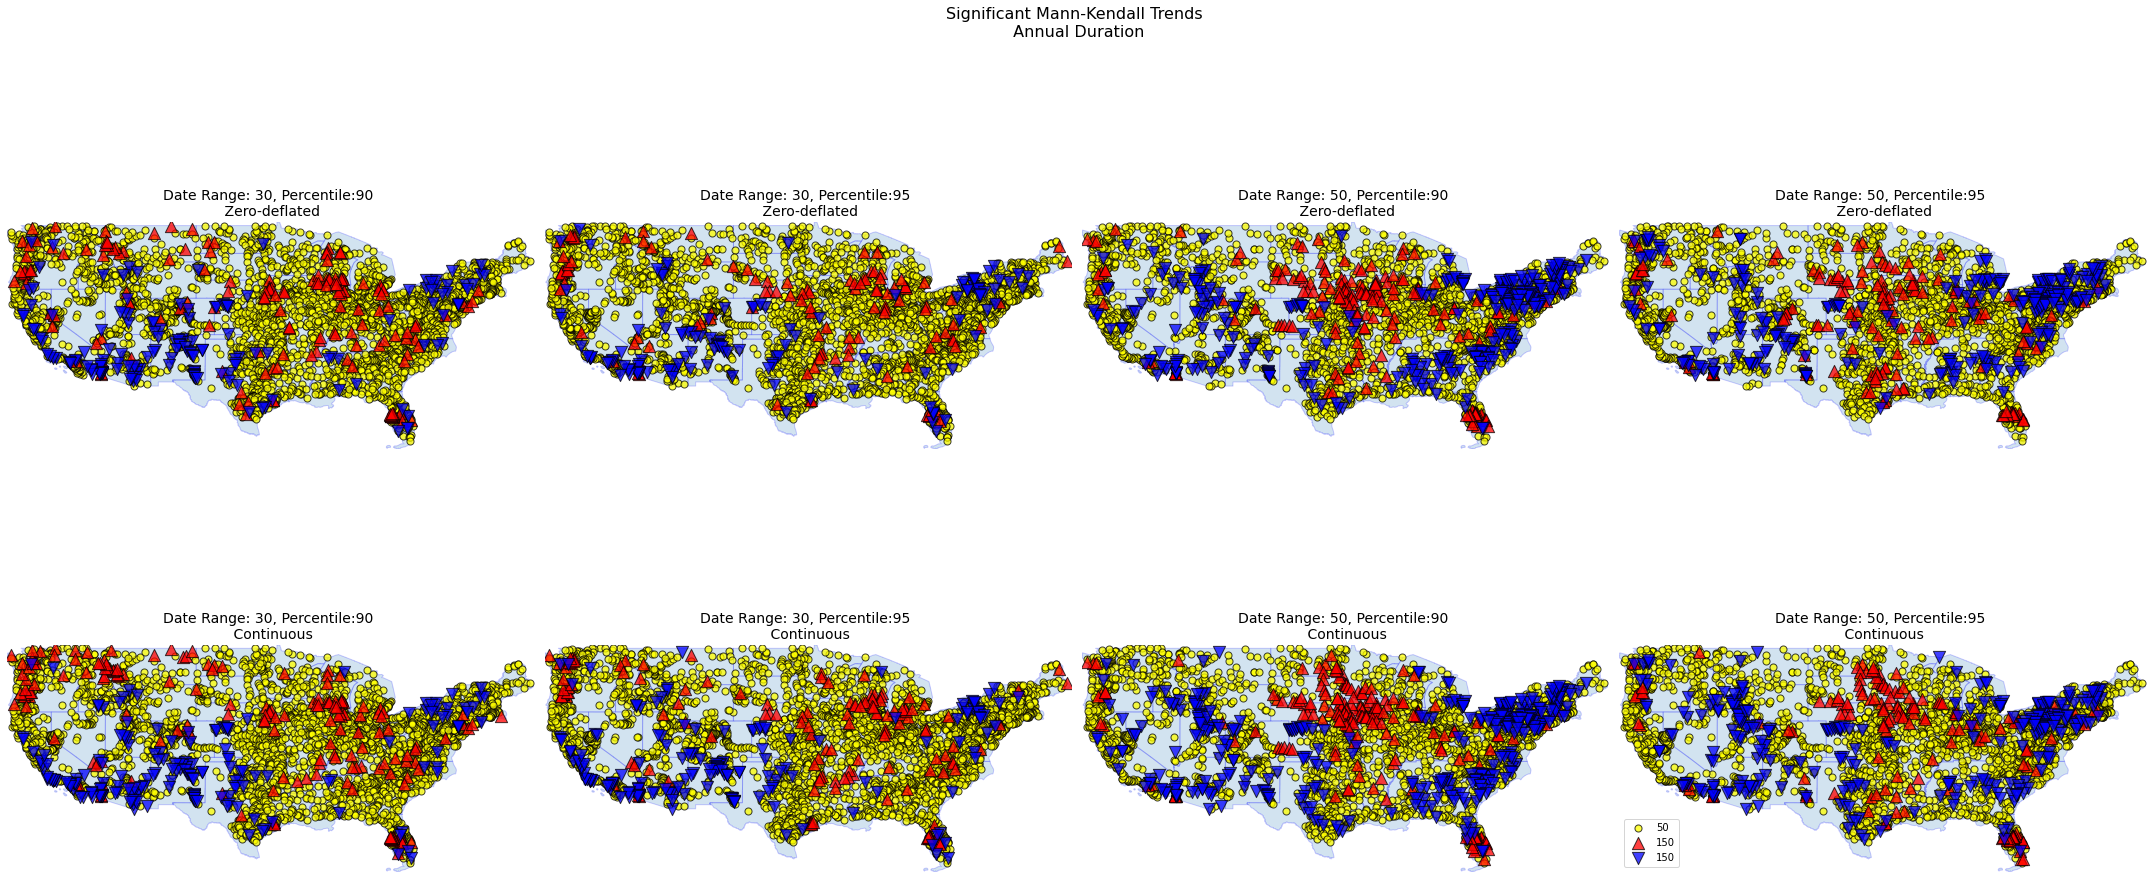

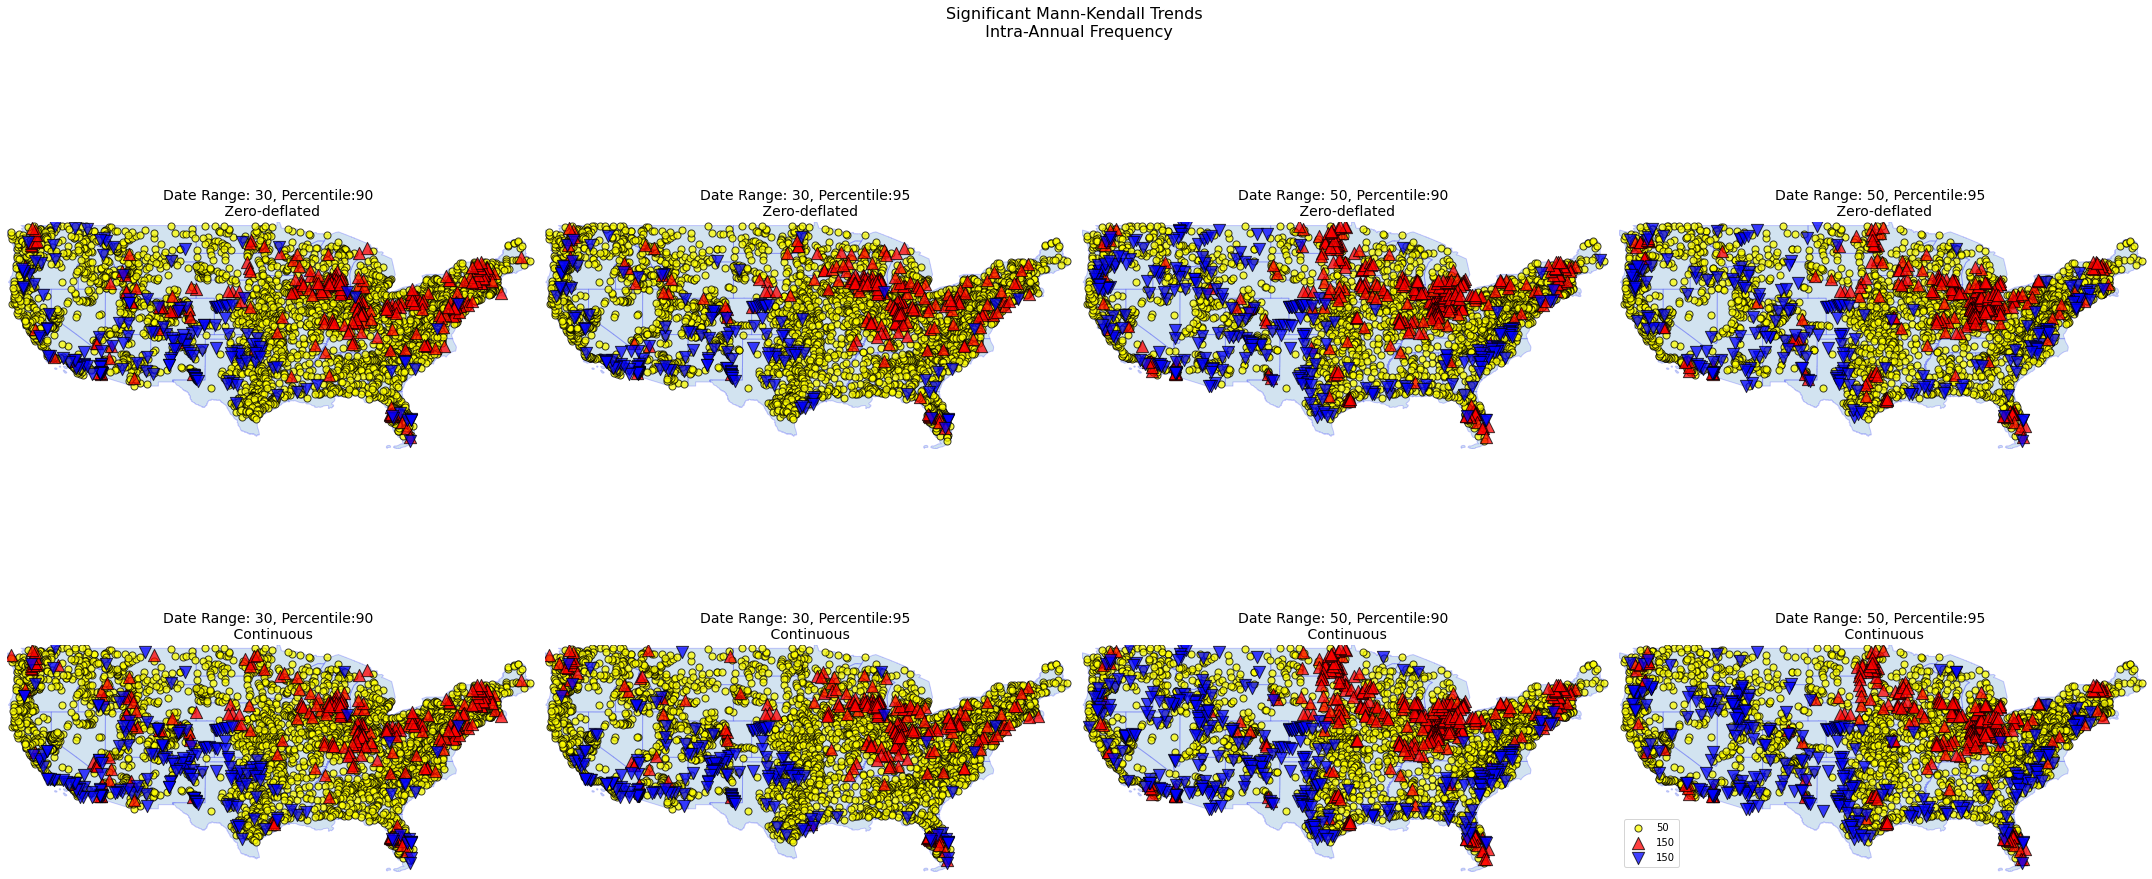

In [252]:
trend_options = ['no trend', 'increasing', 'decreasing']

def plot_mkt_trend(sheet_name, gages_included):
    '''Plot map of stream gages and corresponding trend (increasing, decreasing, no trend) for each aquifer. '''
    
    trend_options = ['no trend', 'increasing', 'decreasing']
    trend_series = ['trend_zd', 'trend']
    trend_label = ['Zero-deflated', 'Continuous']
    plot_names = {'mk_magnitude':'Annual Magnitude', 'mk_duration':'Annual Duration','mk_intra_annual':'Intra-Annual Frequency'}
    
    date_ranges = ['30', '50']
    percentiles = ['90', '95']
    
    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
    
    i = 0
    for trend in trend_series:
        j = 0
        for date_range in date_ranges:
            for percentile in percentiles:
                
                # Load data sets based on date_range and percentile
                datapath = f'Prelim_Data/National_Metrics/National_Metrics_{date_range}_{percentile}.xlsx'
                df_mk = pd.read_excel(io=datapath, sheet_name=sheet_name)
                df_metrics = pd.read_excel(io=datapath, sheet_name='site_metrics')
                df_valid = df_metrics[df_metrics['valid'] == True]
            
                if gages_included == 'valid_gages':
                    df_mk = pd.merge(df_mk, df_valid, on='site_no', how='inner', suffixes=('_mk', '_valid'))
                else:
                    pass

                plt.suptitle(f'Significant Mann-Kendall Trends \n {plot_names[sheet_name]}', fontsize=16)
                             
                # State plot
                lower48.plot(ax=ax[i,j], edgecolor='blue', alpha = 0.2, legend=True) 
                
                # Custom colormap and marker styles for gages
                colors = {'increasing': 'red', 'decreasing': 'blue', 'no trend': 'yellow'}
                markers = {'increasing': '^', 'decreasing': 'v', 'no trend': 'o'}
                marker_sizes = {'increasing': 150, 'decreasing': 150, 'no trend': 50}
                
                # Gages plot, with points marked by MK trend
                lat = df_mk['dec_lat_va_valid'].tolist()
                long = df_mk['dec_long_va_valid'].tolist()
                geometry = [Point(xy) for xy in zip(long, lat)]
                geo_df = gpd.GeoDataFrame(geometry=geometry)
                
                for trend_opt in trend_options:
                    df_subset = df_mk[df_mk[trend] == trend_opt]
                    geo_subset = geo_df.iloc[df_subset.index]
                    #print(colors[trend_opt]); color=str(colors[trend_opt]),
                    bx = geo_subset.plot(ax=ax[i,j], color=colors[trend_opt], marker=markers[trend_opt], markersize=marker_sizes[trend_opt], 
                                         label=marker_sizes[trend_opt], edgecolor='black', linewidth=1, alpha=0.75, legend=True)

                ax[i,j].set_title(f'Date Range: {date_range}, Percentile:{percentile} \n {trend_label[i]}', fontsize=14)
               # if j == 0:
               #     ax[i,j].set_ylabel(f'{trend_series}')
                ax[i,j].margins(0, tight=True)
                ax[i,j].set_axis_off()
                             
                j += 1
        i += 1

#         img_str = f'../saved_visuals/{dataset[:-4]}.png'
#         if os.path.exists(img_str) and overwrite:
#             plt.savefig(f'../saved_visuals/{aquifer}_{sheet_name}.png')
#         elif not os.path.exists(img_str):
#             plt.savefig(f'../saved_visuals/{aquifer}_{sheet_name}.png')
    
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'Saved_Visuals/MK_test/trend_map_{percentile}_{date_range}_{sheet_name}_{gages_included}.png', bbox_inches='tight')
    plt.show()
    return

sheet_names = ['mk_magnitude', 'mk_duration','mk_intra_annual']
#for aquifer in aquifer_list:
for sheet_name in sheet_names:
    plot_mkt_trend(sheet_name, 'valid_gages')

In [248]:
date_range = '30'
percentile = '90'
datapath = f'Prelim_Data/National_Metrics/National_Metrics_{date_range}_{percentile}.xlsx'
df_mk = pd.read_excel(io=datapath, sheet_name=sheet_name)
df_metrics = pd.read_excel(io=datapath, sheet_name='site_metrics')
df_valid = df_metrics[df_metrics['valid'] == True]
df_mk = pd.merge(df_mk, df_valid, on='site_no', how='inner', suffixes=('_mk', '_valid'))

In [253]:
data_paths = {
    '30_90': 'Prelim_Data/National_Metrics/National_Metrics_30_90.xlsx',
    '50_90': 'Prelim_Data/National_Metrics/National_Metrics_50_90.xlsx'
}
dfs = {key: pd.read_excel(path, sheet_name='site_metrics') for key, path in data_paths.items()}

In [254]:
dfs

{'30_90':        site_no analyze_start analyze_end  analyze_range  quantile  valid  \
 0      2339495    2006-07-26  2020-09-30             15       0.9  False   
 1      2342500    1990-10-01  2020-09-30             30       0.9   True   
 2      2361000    1990-10-01  2020-09-30             30       0.9   True   
 3      2361500    2000-12-07  2020-09-30             20       0.9  False   
 4      2363000    1990-10-01  2020-09-30             30       0.9   True   
 ...        ...           ...         ...            ...       ...    ...   
 7853  13014500    2008-04-01  2020-09-30             13       0.9  False   
 7854  13016305    1995-06-02  2020-09-30             26       0.9  False   
 7855  13016450    1994-03-24  2020-09-30             27       0.9  False   
 7856  13018300    1990-10-01  2020-09-30             30       0.9   True   
 7857  13018350    1991-04-01  2020-09-30             28       0.9  False   
 
       missing_data%  threshold  hmf_years  annual_hmf  ...  dec_

## Single Aquifer Plotting
Plot a single aquifer's water guages based on metric of choice. HUC4 watershed boundaries are the blue zones with the aquifer outline in red.

Controls:

In [2]:
import Src.classes as cl
import Src.func_ko as fn
reload(cl)
reload(fn)

# Dataset selection
aquifer = cl.high_plains_aquifer
range = 30
quantile = 90

try:
    dataset = f'{aquifer.name}_{range}_{quantile}.xlsx'
    datapath = f'Prelim_Data/{aquifer.name}/{dataset}'
    df = pd.read_excel(datapath, sheet_name='site_metrics')
    df_valid, df_invalid = fn.filter_by_valid(df)
    df_valid = df_valid.reset_index(drop=True)
    print(f'Valid Sites: {len(df_valid)} of {len(df)}')
    
except Exception as e:
    print(e)

# Metric to be plotted where metrics are column names from the dataset
metric = 'annual_hmf' #'annual_hmf'

# True if you want to overwrite current images
overwrite = False
save_img = False

Valid Sites: 274 of 327


In [43]:
# New column of values in a column that correspond with a bin size
geo_df['annual_hmf'].min()
geo_df['annual_hmf'].max()

1.88151853570632

## Multiple Aquifer Plotting
Plot multiple aquifers using multiple datasets on a single map by pointing to a directory with aquifer datasets of matching range and quantile.

Controls:

In [33]:
# List of aquifers to plot
aquifers = [cl.arizona_alluvial_aquifer, cl.central_valley_aquifer, cl.columbia_plateau_aquifer, cl.upper_clairborne_aquifer,
            cl.high_plains_aquifer, cl.snake_river_aquifer, cl.coastal_lowlands_aquifer]

range = 30
quantile = 90

# Metric to be plotted where metrics are column names from the dataset
## 'annual_hmf'
## 'six_mo_hmf'
## 'three_mo_hmf'
## 'annual_duration'
## 'inter_annual%'
## 'intra_annual'
## 'timing'
## 'event_duration'
## 'event_hmf'
## 'threshold'
metric = 'threshold'
# True if you want to show HUC4 boundaries (significantly increases runtime)
show_huc4 = True
show_usgs_aqs = True
# True if you want to save image. Overwrite true if you want to overwrite existing image of same name
save_img = True
overwrite = True
# True if you want a context basemap (adds runtime)
basemap = False

show_huc2 = False
show_huc4 = False
show_rateb_aqs = True

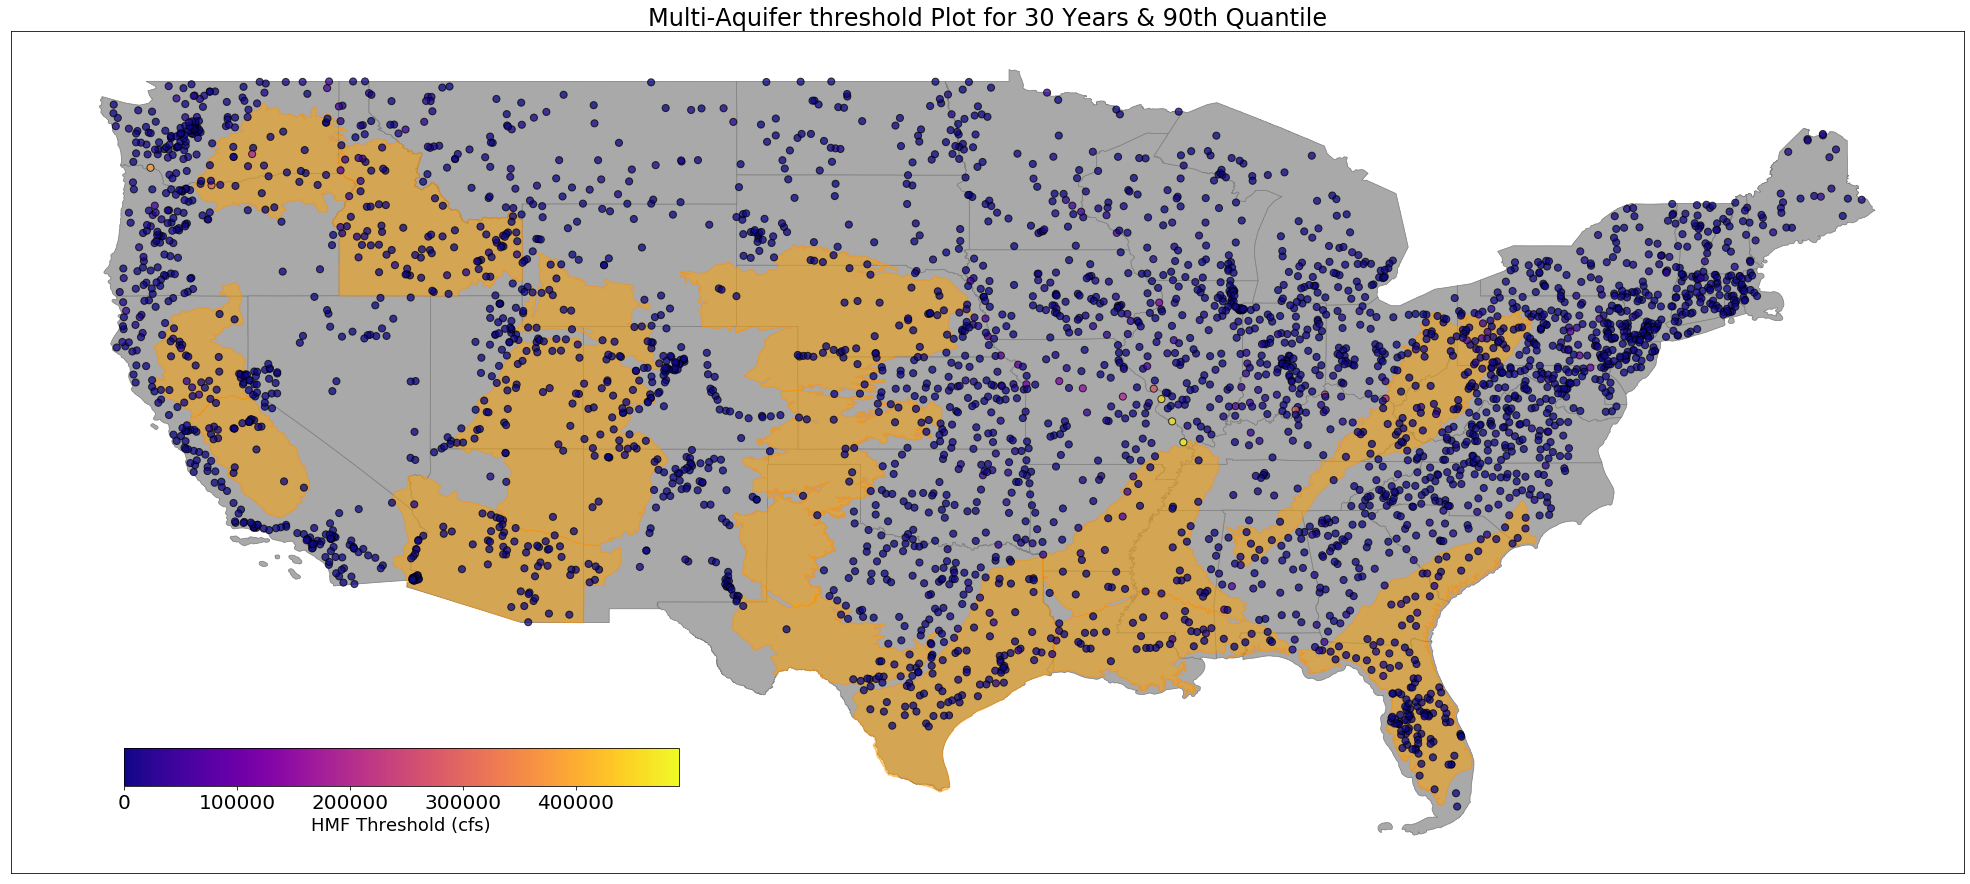

In [35]:
def plot_hmf_metric(metric):    
    fig, ax = plt.subplots(figsize=(35, 35))
    plt.title(f"Multi-Aquifer {metric} Plot for {range} Years & {quantile}th Quantile", loc='center', fontsize=24)

    # Lower-48 Plot
    if not basemap:
        fn.plot_lower_48(ax)

    if show_rateb_aqs:
        fn.plot_rateb_aquifers(ax=ax, edgecolor='darkorange', facecolor='orange', alpha=0.5)

    if show_huc2:
        fn.plot_huc2(ax=ax, codes=[], linewidth=2.0, edgecolor='fuchsia', facecolor='none', alpha=1.0)

    if show_huc4:
        fn.plot_huc4(ax=ax, codes=[], linewidth=2.0, edgecolor='fuchsia', facecolor='none', alpha=1.0)

    # Merge all dataframes so we can accurately track min/max values for colorbar scaling
    # Additonally, plot HUC4 and aquifer boundaries
    # df_all_aq = pd.DataFrame()
    # for aq in aquifers:
    #     try:
    #         df = pd.read_excel(f'{aq.datasets_dir}/{aq.name}_{range}_{quantile}.xlsx', sheet_name='site_metrics')
    #         df_all_aq = pd.concat([df_all_aq.reset_index(drop=True), df.reset_index(drop=True)]).reset_index(drop=True)
    #     except Exception as e:
    #         print(f"ERROR: No dataset found for {aq.name} at {aq.datasets_dir}/{aquifer.name}_{range}_{quantile}.xlsx")

    #     # HUC4 Region Plot
    #     if show_huc4:
    #         for root, dirs, files in os.walk(aq.wb_dir):
    #             #print(root, dirs, files)
    #             if os.path.basename(root).startswith('NHD_H_'):
    #                 if aq.wb_shapefiles in files:
    #                     shapefile_aq_path = os.path.join(root, aq.wb_shapefiles)
    #                     ws_gdf = gpd.read_file(shapefile_aq_path)
    #                     ws_gdf = ws_gdf.to_crs(epsg=4269)
    #                     ws_gdf.plot(ax=ax, edgecolor='blue', alpha=0.30, linewidth=0.5)

    #     # Aquifer Boundary Plot
    #     if show_usgs_aqs:
    #         aq_gdf = gpd.read_file(aq.aq_shapefile)
    #         aq_gdf = aq_gdf.to_crs(epsg=4269)
    #         aq_gdf.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=1.00)

    df_all_aq = pd.read_excel(f'Prelim_Data/National_Metrics_{range}_{quantile}.xlsx', sheet_name='site_metrics')


    # L/B/W/H
    cax = fig.add_axes([0.17, 0.37, 0.22, 0.015])

    # Water Gauges Plot
    df_all_aq, _ = fn.filter_by_valid(df_all_aq)
    df_all_aq = df_all_aq.reset_index(drop=True)    
    cmap, mappable = fn.scale_colorbar(df_all_aq, metric)
    geo_df = fn.convert_geometry(df_all_aq)
    bx = geo_df.plot(ax=ax, column=df_all_aq[metric], markersize=200, marker='.', cmap='plasma', edgecolor='black', linewidth=1, alpha=0.75)

    # Colorbar setup
    cbx = plt.colorbar(mappable, cax=cax, pad=2.0, shrink=0.5, orientation='horizontal', alpha=1.0)
    cbx.set_label(fn.FLOW_METRIC_UNITS[metric], size=18)
    cbx.ax.tick_params(labelsize=20)  
    ax.set_yticks([])
    ax.set_xticks([])

    #if basemap:
    #    fn.plot_basemap(ax)

    # Save images if they don't exist or if overwrite is True
    if save_img:
        img_path = f'Saved_Visuals/National_{metric}_{range}_{quantile}.png'
        fn.save_plot_as_image(img_path, overwrite)    
    return
    
plot_hmf_metric(metric)

## National Validity Plot
Plots the validity of every water gauge with daily streamflow data available

In [216]:
data_range = 30
folder = 'National_Validity'
dataset = f'National_Validity.xlsx'
datapath = f'Prelim_Data/{folder}/{dataset}'
lower_48_shp_path = 'ShapeFiles/Lower48/lower48.shp'

show_huc2 = False
show_huc4 = False
show_rateb_aqs = False

save_img= True
overwrite = True

datapath = f'Prelim_Data/National_Validity/National_Validity.xlsx'
df_validity = pd.read_excel(datapath, sheet_name='Sheet1')

In [217]:
data_range = 30

df_30_90['date_range_30'] = df_30_90['analyze_range'] >= 27
df_50_90['date_range_50'] = df_50_90['analyze_range'] >= 45
df_30_90['data_cont_30'] = df_30_90['missing_data%'] <= 10
df_50_90['data_cont_50'] = df_50_90['missing_data%'] <= 10

geo_df = fn.convert_geometry(df_30_90)

colors = df_30_90[f'date_range_{data_range}'].astype(str) + df_30_90[f'data_cont_{data_range}'].astype(str)
gdf_green = geo_df[colors == 'TrueTrue']
gdf_yellow = geo_df[colors == 'TrueFalse']
gdf_red = geo_df[colors == 'FalseTrue']
gdf_black = geo_df[colors == 'FalseFalse']

print(f'30-Year Date Range')
print(f'Total Sites with 00060_Mean Data: {len(df_30_90)}')
print(f'Valid Range and Continuity: {len(gdf_green)} ({round(len(gdf_green)/len(df_validity)*100, 2)}%)')
print(f'Valid Range, Invalid Continuity: {len(gdf_yellow)} ({round(len(gdf_yellow)/len(df_validity)*100, 2)}%)')
print(f'Invalid Range, Valid Continuity: {len(gdf_red)} ({round(len(gdf_red)/len(df_validity)*100, 2)}%)')
print(f'Invalid Range and Continuity: {len(gdf_black)} ({round(len(gdf_black)/len(df_validity)*100, 2)}%)')

data_range = 50

df_30_90['date_range_30'] = df_30_90['analyze_range'] >= 27
df_50_90['date_range_50'] = df_50_90['analyze_range'] >= 45
df_30_90['data_cont_30'] = df_30_90['missing_data%'] <= 10
df_50_90['data_cont_50'] = df_50_90['missing_data%'] <= 10

geo_df = fn.convert_geometry(df_50_90)

colors = df_50_90[f'date_range_{data_range}'].astype(str) + df_50_90[f'data_cont_{data_range}'].astype(str)
gdf_green = geo_df[colors == 'TrueTrue']
gdf_yellow = geo_df[colors == 'TrueFalse']
gdf_red = geo_df[colors == 'FalseTrue']
gdf_black = geo_df[colors == 'FalseFalse']

print(f'50-Year Date Range')
print(f'Total Sites with 00060_Mean Data: {len(df_30_90)}')
print(f'Valid Range and Continuity: {len(gdf_green)} ({round(len(gdf_green)/len(df_validity)*100, 2)}%)')
print(f'Valid Range, Invalid Continuity: {len(gdf_yellow)} ({round(len(gdf_yellow)/len(df_validity)*100, 2)}%)')
print(f'Invalid Range, Valid Continuity: {len(gdf_red)} ({round(len(gdf_red)/len(df_validity)*100, 2)}%)')
print(f'Invalid Range and Continuity: {len(gdf_black)} ({round(len(gdf_black)/len(df_validity)*100, 2)}%)')

30-Year Date Range
Total Sites with 00060_Mean Data: 7858
Valid Range and Continuity: 4270 (52.81%)
Valid Range, Invalid Continuity: 198 (2.45%)
Invalid Range, Valid Continuity: 0 (0.0%)
Invalid Range and Continuity: 3390 (41.93%)
50-Year Date Range
Total Sites with 00060_Mean Data: 7858
Valid Range and Continuity: 3329 (41.18%)
Valid Range, Invalid Continuity: 137 (1.69%)
Invalid Range, Valid Continuity: 0 (0.0%)
Invalid Range and Continuity: 4392 (54.32%)


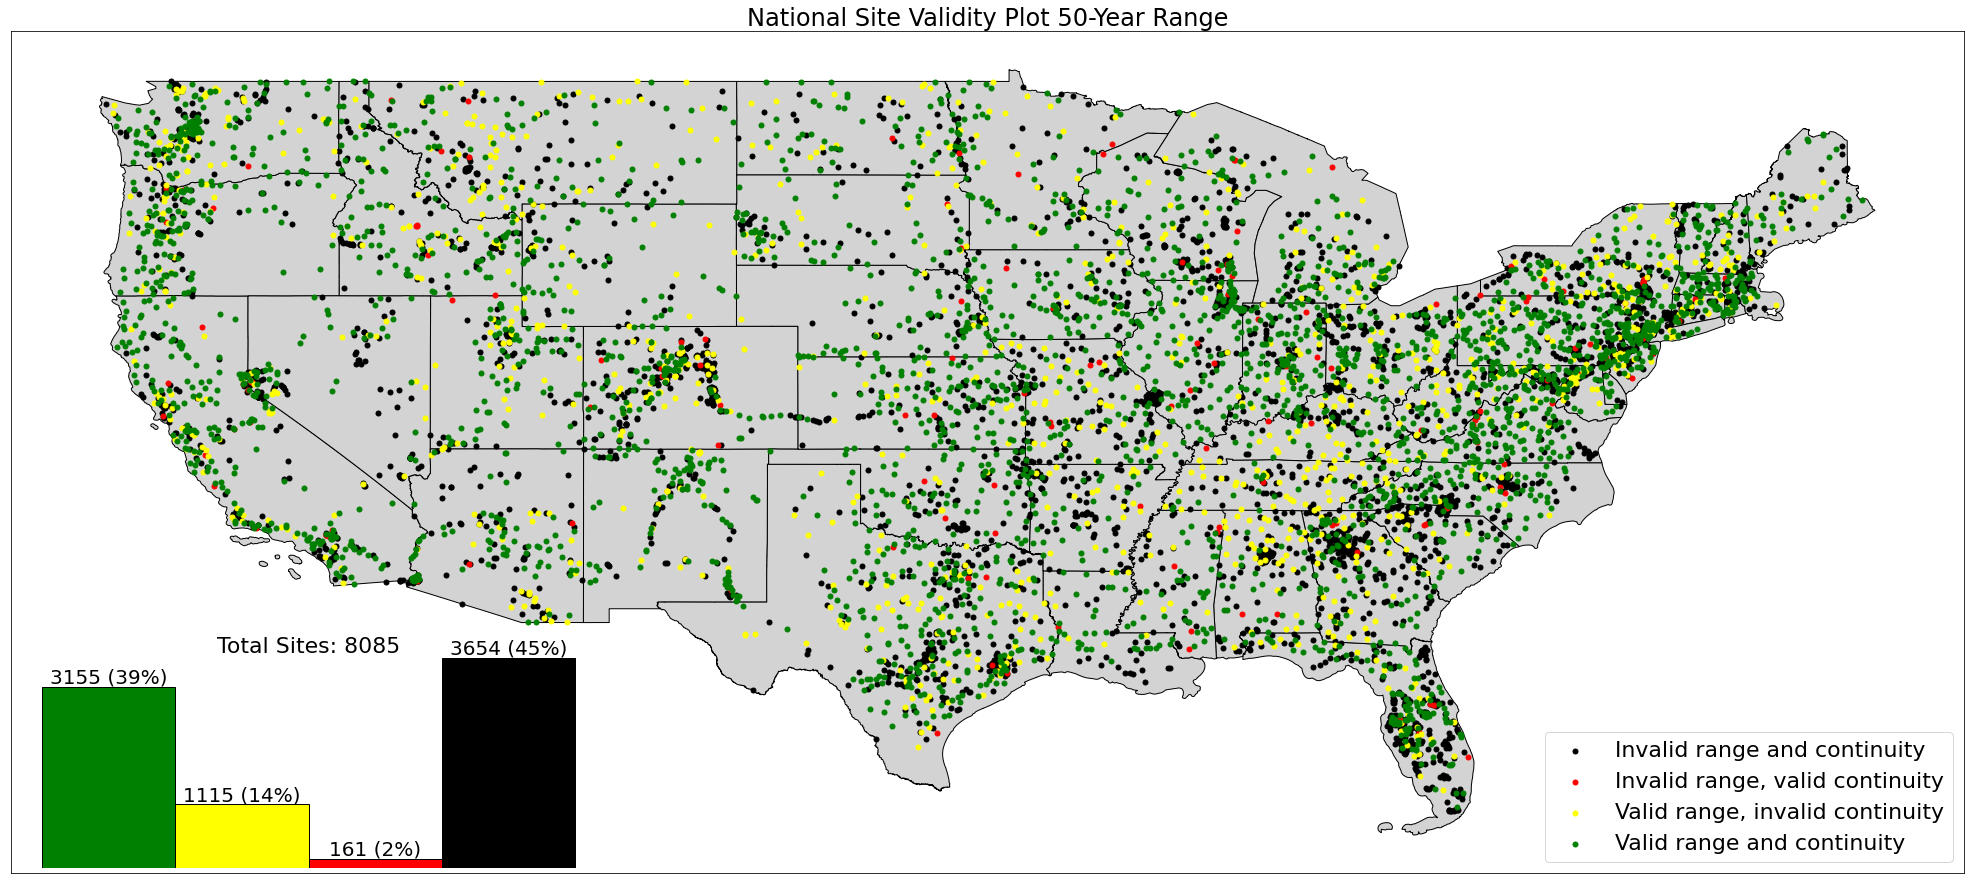

Total Sites with 00060_Mean Data: 8085
Valid Range and Continuity: 3155 (39.02%)
Valid Range, Invalid Continuity: 1115 (13.79%)
Invalid Range, Valid Continuity: 161 (1.99%)
Invalid Range and Continuity: 3654 (45.19%)


In [218]:
fig, ax = plt.subplots(figsize=(35, 35))
plt.title(f"National Site Validity Plot {data_range}-Year Range", loc='center', fontsize=24)

lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
lower48 = lower48.to_crs(epsg=4269)
#lower48 = lower48.to_crs('ESRI:102003')
lower48.plot(ax=ax, edgecolor='black', facecolor='lightgrey', linewidth=1.0)  

if show_rateb_aqs:
    fn.plot_rateb_aquifers(ax=ax, edgecolor='darkorange', facecolor='orange', alpha=0.5)
    
if show_huc2:
    fn.plot_huc2(ax=ax, codes=[], linewidth=2.0, edgecolor='fuchsia', facecolor='none', alpha=1.0)
    
if show_huc4:
    fn.plot_huc4(ax=ax, codes=[], linewidth=2.0, edgecolor='fuchsia', facecolor='none', alpha=1.0)

geo_df = fn.convert_geometry(df_validity)

colors = df_validity[f'date_range_{data_range}'].astype(str) + df_validity[f'data_cont_{data_range}'].astype(str)
gdf_green = geo_df[colors == 'TrueTrue']
gdf_yellow = geo_df[colors == 'TrueFalse']
gdf_red = geo_df[colors == 'FalseTrue']
gdf_black = geo_df[colors == 'FalseFalse']

gdf_black.plot(ax=ax, color='black', label='Invalid range and continuity', markersize=100, marker='.', alpha=1.0)
gdf_red.plot(ax=ax, color='red', label='Invalid range, valid continuity', markersize=100, marker='.', alpha=1.0)
gdf_yellow.plot(ax=ax, color='yellow', label='Valid range, invalid continuity', markersize=100, marker='.', alpha=1.0)
gdf_green.plot(ax=ax, color='green', label='Valid range and continuity', markersize=100, marker='.', alpha=1.0)
plt.legend(prop={'size': 22}, loc='lower right')

order = {'TrueTrue': 0, 'TrueFalse': 1, 'FalseTrue': 2, 'FalseFalse': 3}
colors = colors.map(order)
axins = inset_axes(ax, width="30%", height="25%", loc='lower left', axes_kwargs={'frame_on': False})
counts, edges, patches = axins.hist(colors, bins=4, edgecolor='black')

# Define colors for each bin
bin_colors = ['green', 'yellow', 'red', 'black']

# Iterate over patches (bars) and set their colors
for patch, color in zip(patches, bin_colors):
    patch.set_facecolor(color)

for count, edge, patch in zip(counts, edges, patches):
    height = patch.get_height()
    center = edge + (patch.get_x() + patch.get_width() - edge) / 2
    axins.text(center, height - 0.5, f'{count:.0f} ({round(count/len(df_validity)*100, 0):.0f}%)', ha='center', va='bottom', fontsize=20)

axins.set_ylim(0, max(counts) + 5)
axins.set_title(f'Total Sites: {len(df_validity)}', fontsize=22, loc='center')
axins.set_xticks([])
axins.set_yticks([])

ax.set_xticks([])
ax.set_yticks([])

if save_img:
    img_path = f'Saved_Visuals/Valid_gages/natl_validity_aquifers_{data_range}.png'
    #img_path = f'Saved_Visuals/Valid_gages/valid_only_aquifers_{data_range}.png'
    fn.save_plot_as_image(img_path, overwrite) 

plt.show()


print(f'Total Sites with 00060_Mean Data: {len(df_validity)}')
print(f'Valid Range and Continuity: {len(gdf_green)} ({round(len(gdf_green)/len(df_validity)*100, 2)}%)')
print(f'Valid Range, Invalid Continuity: {len(gdf_yellow)} ({round(len(gdf_yellow)/len(df_validity)*100, 2)}%)')
print(f'Invalid Range, Valid Continuity: {len(gdf_red)} ({round(len(gdf_red)/len(df_validity)*100, 2)}%)')
print(f'Invalid Range and Continuity: {len(gdf_black)} ({round(len(gdf_black)/len(df_validity)*100, 2)}%)')

## Box Plot and Outliers of HMF Metrics
This plot shows the distribution of each HMF metric, illustrating the mean, median, and interquartile ranges. Outliers (less than the 10th percentile and greater than the 90th percentile) are also selected for each metric

In [76]:
range = 30
quantile = 90

df_natl_30_90 = pd.read_excel(f'Prelim_Data/National_Metrics_{range}_{quantile}.xlsx', sheet_name='site_metrics')
df_natl_30_90, _ = fn.filter_by_valid(df_natl_30_90)

# Metric to be plotted where metrics are column names from the dataset
metric_list = ['threshold', 'annual_hmf', 'six_mo_hmf', 'three_mo_hmf', 'annual_duration', 'event_duration', 'event_hmf', 'inter_annual%', 'intra_annual', 'timing']
## 'annual_hmf'
## 'six_mo_hmf'
## 'three_mo_hmf'
## 'annual_duration'
## 'inter_annual%'
## 'intra_annual'
## 'timing'
## 'event_duration'
## 'event_hmf'
## 'threshold'
metric = 'annual_hmf'

# True if you want to save image. Overwrite true if you want to overwrite existing image of same name
save_img = True
overwrite = True

In [78]:
#df_natl_30_90

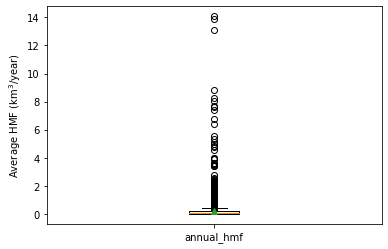

In [79]:
def plot_hmf_metric_boxplot(df, metric):
    plt.boxplot(df[metric], showmeans=True)
    #print(boxplot['fliers'])
    plt.xticks(ticks=[1], labels=[f'{metric}'])
    plt.ylabel(fn.FLOW_METRIC_UNITS[metric])
    plt.show()
    return

def get_boxplot_outliers(df, metric):
    boxplot = plt.boxplot(df[metric], showmeans=True)
    plt.xticks(ticks=[1], labels=[f'{metric}'])
    plt.ylabel(fn.FLOW_METRIC_UNITS[metric])
    plt.show()
    
    # Extract outliers
    outliers = [flier.get_ydata() for flier in boxplot['fliers']] # note: boxplot['fliers'] is a graphical object
    # Flatten the outliers list
    outliers = [item for sublist in outliers for item in sublist]
    outlier_site_nos = df.loc[df[metric].isin(outliers), 'site_no']
    return outliers, outlier_site_nos

# All HMF metrics
#for metric in metric_list:
#    plot_hmf_metric_boxplot(df_natl_30_90, metric)

# Singular HMF metric
#plot_hmf_metric_boxplot(df_natl_30_90, metric)
outliers, outlier_site_nos = get_boxplot_outliers(df_natl_30_90, metric)

In [88]:
# Get 10th percentile of sites
def get_percentile_sites(df, metric, percentile):
    df_metric = pd.DataFrame(df[metric])
    threshold = df_metric.quantile(q=percentile, axis=0).iloc[0]
    if percentile < 0.5:
        df_metric_subset = df_metric[df_metric[metric] < threshold]
    else:
        df_metric_subset = df_metric[df_metric[metric] > threshold]
    perctile_site_nos = df.loc[df[metric].isin(df_metric_subset[metric]), 'site_no']
    return perctile_site_nos

perctile_site_nos_10 = get_percentile_sites(df_natl_30_90, metric, 0.1)
perctile_site_nos_90 = get_percentile_sites(df_natl_30_90, metric, 0.9)
print(perctile_site_nos_10)
print(perctile_site_nos_90)

62       9384000
63       9390500
78       9428505
79       9428510
100      9484600
          ...   
4084    12472600
4120     3052500
4214     5406500
4234     6253000
4271    13018300
Name: site_no, Length: 337, dtype: int64
30      2425000
44      2465000
45      2467000
47      2469761
59      9380000
         ...   
4189    5365500
4193    5369500
4207    5400760
4212    5404000
4215    5407000
Name: site_no, Length: 337, dtype: int64


## Monthly HMF Frequency per Aquifer Plot
This plot shows the average frequency in which sites experienced HMF, broken down by month, across an aquifer region. The `mfreq_` datasheets are generated by commented out code in `monthly_hmf()` automatically when aquifer analysis is run. To generate an `mfreq_` dataset, uncomment the code, run aquifer analysis, and then move/rename the resulting dataset to `'Sample_Sheets/mfreq_{aquifer_name}_{range}_{quantile}.csv'`

In [81]:
aquifer = cl.arizona_alluvial_aquifer
range = 30
quantile = 90

hist_data_set = f'mfreq_{aquifer.name}_{range}_{quantile}.csv'
hist_data_path = f'Sample_Sheets/{hist_data_set}'

num_sites = len(pd.read_excel(f'Prelim_Data/{aquifer.name}/{aquifer.name}_{range}_{quantile}.xlsx'))

df_freq = pd.read_csv(hist_data_path)
df_freq = df_freq.sort_values('month')
df_freq = df_freq.drop(columns='Unnamed: 0')
df_freq = df_freq.reset_index(drop=True)
df_freq = df_freq.fillna(0)
df_freq['count'] = df_freq['count'] / num_sites
df_freq['00060_Mean'] = df_freq['00060_Mean'] / num_sites

C:\Users\alekh\AppData\Local\Temp\ipykernel_9116\3884315333.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mappable, ax=None)


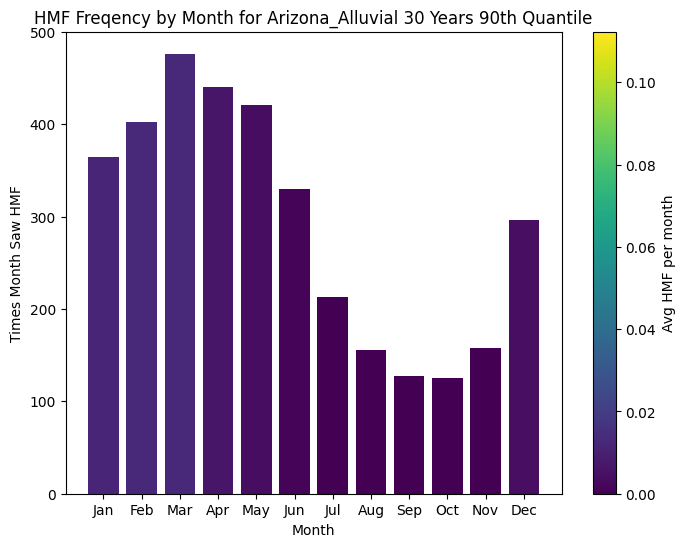

In [82]:
plt.figure(figsize=(8, 6))
plt.xticks(df_freq['month'], [calendar.month_name[int(m)][:3] for m in df_freq['month']], rotation=0)

vmin = df_freq['00060_Mean'].min()
vmax = df_freq['00060_Mean'].max()
norm = mcolors.Normalize(vmin, vmax)
cmap = 'viridis'
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(df_freq['00060_Mean'])

bars = plt.bar(df_freq['month'], df_freq['count'], color=plt.cm.viridis(df_freq['00060_Mean']))
cbar = plt.colorbar(mappable, ax=None)
cbar.set_label('Avg HMF per month')
plt.title(f'HMF Freqency by Month for {aquifer.name} {range} Years {quantile}th Quantile')
plt.xlabel('Month')
plt.ylabel('Times Month Saw HMF')
plt.show()